# Oliver Wyman HackatOW #
### In the first task of the project we will start by cleaning and manipulating the datasets we were provided, identifying and solving data inconsistencies as well as delivering relevant statistics on specific features. ###



### Importing libraries and packages ###

In [1]:
import pandas as pd
import numpy as np 
import plotly
import math
import matplotlib
import matplotlib.pyplot as plt 
import warnings
matplotlib.rcParams['agg.path.chunksize'] = 10000
warnings.filterwarnings("ignore")
from dataprep.eda import plot, create_report

### Data Loading ###

### CPI Dataset ###

In [2]:
CPIs = pd.read_excel('Consumer Price Index_vShared.xlsx')
display(CPIs)
CPIs.info()

Date_monthly  CPI_monthly  Date_daily   CPI_daily
0      2019-01-01         120.5 2019-01-01  120.500000
1      2019-02-01         120.8 2019-01-02  120.509677
2      2019-03-01         121.1 2019-01-03  120.519355
3      2019-04-01         121.1 2019-01-04  120.529032
4      2019-05-01         121.4 2019-01-05  120.538710
...           ...           ...        ...         ...
1456          NaT           NaN 2022-12-27  129.619355
1457          NaT           NaN 2022-12-28  129.635484
1458          NaT           NaN 2022-12-29  129.651613
1459          NaT           NaN 2022-12-30  129.667742
1460          NaT           NaN 2022-12-31  129.683871

[1461 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_monthly  48 non-null     datetime64[ns]
 1   CPI_monthly   48 non-null     float64       
 2   Date_daily    1461 non-null   datetime64[ns]
 3   CPI_daily     1461 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 45.8 KB


In [ ]:
CPIs.describe()

We immediately see that an error in naming one column was made.

In [3]:
# stripping the spaces from CPI_monthly
CPIs = CPIs.rename(columns = {'CPI_monthly ': 'CPI_monthly'})

In [ ]:
# getting a summary of CPI_daily
plot(CPIs, 'CPI_daily') # seems normal!

There are many missing values in this feature, it will not be so important as we can eventually compute it using daily data.

In [ ]:
# getting a summary of Date_monthly
plot(CPIs, 'CPI_monthly') # --> mostly missing values!

In [ ]:
print(CPIs.columns)

Let us see the daily trend of Consumer price Index over time.

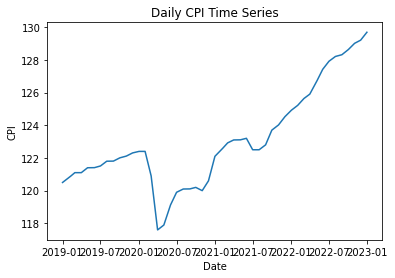

In [4]:
# visualizing the CPI_daily data in a time series with respect to Date_daily

# Convert the Date_daily column to a datetime data type
CPIs['Date_daily'] = pd.to_datetime(CPIs['Date_daily'])

# Set the Date_daily column as the index
CPIs.set_index('Date_daily', inplace=True)

# Create a line plot of CPI_daily against Date_daily
plt.plot(CPIs['CPI_daily'])

# Set the plot title and axis labels
plt.title('Daily CPI Time Series')
plt.xlabel('Date')
plt.ylabel('CPI')

# Reset the index of the CPI_data DataFrame
CPIs.reset_index(inplace = True)

# Display the plot
plt.show()

### Product Dataset ###

Now, we look into the product dataset and see whether something has to cleaned.

In [5]:
products = pd.read_csv('Hackathon_DimProduct_SAN_vShared.csv')

display(products)
products.info()

ProductKey  BrandKey  SupplierKey ProductCategory_Lvl1  \
0    key_52138      3521   1039040101           Category A   
1        19864      3521   1039040125           Category A   
2        95144      1713   1049688101           Category A   
3        23070      3521   1050235101           Category A   
4        93165      3521   1039040125           Category A   
..         ...       ...          ...                  ...   
293      12353      3521   1036290101           Category A   
294      55442       132   1036290101           Category A   
295      78206      3521   1039040101           Category A   
296      55438       132   1036290101           Category A   
297  key_96971      3521   1036290101           Category A   

    ProductCategory_Lvl2  
0            category aa  
1            Category AC  
2            Category AA  
3            Category AC  
4            Category AC  
..                   ...  
293          Category AB  
294          Category AC  
295          Category AC  
296          Category AB  
297          Category AA  

[298 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ProductKey            298 non-null    object
 1   BrandKey              298 non-null    int64 
 2   SupplierKey           298 non-null    int64 
 3   ProductCategory_Lvl1  298 non-null    object
 4   ProductCategory_Lvl2  298 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


In [ ]:
# getting a summary of ProductKey
plot(products, 'ProductKey') # seems normal!

In [ ]:
# getting a summary of BrandKey
plot(products, 'BrandKey') # seems normal!

In [ ]:
# getting a summary of SupplierKey
plot(products, 'SupplierKey') # seems normal!

In [ ]:
# getting a summary of ProductCategory_Lvl1
plot(products, 'ProductCategory_Lvl1') # seems normal!

In [ ]:
# getting a summary of ProductCategory_Lvl2
plot(products, 'ProductCategory_Lvl2') # seems normal!

Let us check if any mistake was done in recording products by value counting the categorical columns.

In [ ]:
products["ProductCategory_Lvl1"].value_counts()

In [ ]:
products["ProductCategory_Lvl2"].value_counts()

As it is immediately noticed from the first entry, some product keys are wrongly typed. key_ should not be present in the entries but it appears 4 times. Furthermore, a minor mistake was done in the categories, since some letters were not capitalized properly. We will use simple string manipulation to get the job done.

In [6]:
Productkeycorr = []
ProductCategory_Lvl2corr = []

for p in products["ProductKey"]:
    if "key_" in p:
        p = p[4:]
        Productkeycorr.append(p)
    else:
        Productkeycorr.append(p) 

for c in products["ProductCategory_Lvl2"]:
    
    if c[0] == "c":
        l = c.capitalize()
        l = l[:-2] + l[-2:].upper()
        ProductCategory_Lvl2corr.append(l)
    elif c == "Category  AC" or c == "Category  AE" or c == "Category  AD":
        l = ""
        l = c[0:8] + c[-3:]
        ProductCategory_Lvl2corr.append(l)

    elif c == "Categrory AE":
        l = ""
        l = c[0:5] + c[6:]
        ProductCategory_Lvl2corr.append(l)
    else:
        ProductCategory_Lvl2corr.append(c) 

            
products["ProductCategory_Lvl2"] = np.array(ProductCategory_Lvl2corr)
products["ProductKey"] = np.array(Productkeycorr)


display(products)
        

ProductKey  BrandKey  SupplierKey ProductCategory_Lvl1  \
0        52138      3521   1039040101           Category A   
1        19864      3521   1039040125           Category A   
2        95144      1713   1049688101           Category A   
3        23070      3521   1050235101           Category A   
4        93165      3521   1039040125           Category A   
..         ...       ...          ...                  ...   
293      12353      3521   1036290101           Category A   
294      55442       132   1036290101           Category A   
295      78206      3521   1039040101           Category A   
296      55438       132   1036290101           Category A   
297      96971      3521   1036290101           Category A   

    ProductCategory_Lvl2  
0            Category AA  
1            Category AC  
2            Category AA  
3            Category AC  
4            Category AC  
..                   ...  
293          Category AB  
294          Category AC  
295          Category AC  
296          Category AB  
297          Category AA  

[298 rows x 5 columns]

As we can see below, the categories are finally correct.

In [ ]:
products['ProductCategory_Lvl2'].value_counts()

In [ ]:
len(products['ProductKey'].unique())


### Promotion Dataset ###

Now we will do the same with the promotion dataset, which contains relevant information on the promotions of the asian retailer.

In [7]:
promotions = pd.read_csv('Hackathon_DimPromotion_SAN_vShared.csv')

display(promotions)
promotions.info()

PromotionKey            PromoMechanic PromotionStartDate  \
0            312237          Percentage off          10/1/2021   
1            265157           Buy $X for Y%          2/25/2020   
2            270553           Buy $X for $Y          1/15/2020   
3            308082  X units for $Y (X = 1)          3/10/2021   
4            317323                     PWP          5/13/2022   
...             ...                     ...                ...   
3426         297974  X units for $Y (X = 1)           1/1/2022   
3427         339287           Buy $X for $Y         12/12/2021   
3428         263837  X units for $Y (X = 1)          2/27/2020   
3429         375529  X units for $Y (X > 1)         11/16/2022   
3430         352362  X units for $Y (X > 1)          1/18/2020   

     PromotionEndDate  
0           10/6/2021  
1           2/25/2020  
2           1/27/2020  
3           3/29/2021  
4            7/6/2022  
...               ...  
3426        6/30/2022  
3427       12/12/2021  
3428        3/30/2020  
3429         1/2/2023  
3430         3/4/2020  

[3431 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PromotionKey        3431 non-null   int64 
 1   PromoMechanic       3431 non-null   object
 2   PromotionStartDate  3431 non-null   object
 3   PromotionEndDate    3431 non-null   object
dtypes: int64(1), object(3)
memory usage: 107.3+ KB


As Promomechanic categories will serve for out aggregate analysis, we regroup and see how these are distributed.

In [11]:
promotions["PromoMechanic"].value_counts()

Buy X for Y              898
X units for Y (X = 1)    710
X units for Y (X > 1)    657
Percentage off           338
PWP                      242
Buy X free Y             113
Xth for Y                108
GWP                      106
X units for Y             94
Buy X free X              78
Coupon/Voucher            33
Member Points             24
Unknown                   16
Price off                 14
Name: PromoMechanic, dtype: int64

Since some special characters such as "$" and "% are present in the descriptions, we will get rid of them.

In [10]:
# fixing the issue with LaTex formatting
def remove_special_chars(string):
    """
    This function takes a string as input and removes the "$",  and "%" characters.

    Parameters:
    string (str): The string to be modified.

    Returns:
    str: The modified string.
    """
    return string.replace("$", "").replace("%", "").replace("@","for")

# apply the remove_special_chars function to the Percentage off column
promotions['PromoMechanic'] = promotions['PromoMechanic'].apply(remove_special_chars)

Again, another mistake in column name was made, let's rename it

In [12]:
# removing the white space from PromotionKey column
promotions = promotions.rename(columns = {'PromotionKey ': 'PromotionKey'})

# getting a summary of PromotionKey
#plot(promotions, 'PromotionKey') # seems normal!

In [ ]:
# getting a summary of PromoMechanic
plot(promotions, 'PromoMechanic') # seems normal!

In [ ]:
# getting a summary of PromotionStartDate 
plot(promotions, 'PromotionStartDate') # seems normal!

In [ ]:
# getting a summary of PromotionEndDate
plot(promotions, 'PromotionEndDate') # seems normal!

### Store Dataset ###

The store dataset contains all the stores where the retailer sells its products. The location and the type of store are listed.

In [13]:
stores = pd.read_csv('Hackathon_DimStore_SAN_vShared.csv')

display(stores)
stores.info()

StoreKey DistributionChannel     StoreType Region_Lvl1 Region_Lvl2
0         559            Physical  Store Type B     RegionA   Region 34
1         168            Physical  Store Type B     RegionA    Region 2
2        2061            Physical  Store Type E     RegionA   Region 10
3         590            Physical  Store Type D     RegionA    Region 2
4         301            Physical  Store Type B     RegionA  Region 123
..        ...                 ...           ...         ...         ...
734       463            Physical  Store Type B     RegionB  Region 141
735         4            Physical  Store Type C     RegionA    Region 4
736       280            Physical  Store Type D     RegionB   Region 39
737       688            Physical  Store Type G     RegionA  Region 112
738       892              Online  Store Type H      Online   Region 30

[739 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   StoreKey             739 non-null    int64 
 1   DistributionChannel  739 non-null    object
 2   StoreType            739 non-null    object
 3   Region_Lvl1          739 non-null    object
 4   Region_Lvl2          739 non-null    object
dtypes: int64(1), object(4)
memory usage: 29.0+ KB


In [ ]:
# getting a summary of StoreKey
plot(stores, 'StoreKey') # seems normal!

In [ ]:
# getting a summary of DistributionChannel
plot(stores, 'DistributionChannel') # seems normal!

In [ ]:
# getting a summary of Region_Lvl1
plot(stores, 'Region_Lvl1') # seems normal!

In [ ]:
# getting a summary of Region_Lvl2
plot(stores, 'Region_Lvl2') # seems normal!

In [ ]:
# getting a summary of StoreType
plot(stores, 'StoreType') # seems normal!

Let us see if some strange category comes up in the stores DataFrame.

In [ ]:
stores['StoreKey'].value_counts()

As we can see, there are some annoying duplicates. Let's drop them!

In [14]:
stores.drop_duplicates(inplace = True)

In [ ]:
stores['StoreKey'].value_counts()

In [ ]:
stores["StoreType"].value_counts()

In [ ]:
stores["Region_Lvl1"].value_counts()

In [ ]:
stores["Region_Lvl2"].value_counts()

As we see, there are 2 geographical information on the stores, the first indicates the "larger" region where the store is located, whilst the second shows its subregion.

### Transaction Dataset ###

The transaction dataset is arguably the most important dataset we need. It contains all the transactions, comprising the prices (both the full and the discounted ones) as well as the products sold per transaction (unitvolume).

In [15]:
transactions = pd.read_csv('Hackathon_FactSalesTransactionDATES_vShared.csv')

display(transactions)
transactions.info()

TransactionDate  DayOfWeek WeekendFlag StoreKey ProductKey  \
0             2020-01-29  Wednesday       False      118      49334   
1             2021-10-31     Sunday        True       78      59511   
2             2021-06-17   Thursday       False      672      97438   
3             2022-02-06     Sunday        True      193      58921   
4             2022-03-29    Tuesday       False     2059      44633   
...                  ...        ...         ...      ...        ...   
11300998      2022-02-07     Monday       False       56      62330   
11300999      2020-01-15  Wednesday       False        4      39983   
11301000      2022-09-22   Thursday       False      654      95835   
11301001      2020-03-06     Friday       False      369      49489   
11301002      2020-03-10    Tuesday       False      508      73607   

          UnitVolume  ActualSales  SalesDiscount  RetailFullPrice  
0                2.0    103.35080      -16.87360         120.2244  
1                1.0     17.13725      -17.13725          34.2745  
2                1.0     22.46298      -14.97532          37.4383  
3                2.0     42.18400       -9.49140          51.6754  
4                1.0     31.63800      -12.65520          44.2932  
...              ...          ...            ...              ...  
11300998        31.0    634.02552     -330.40618         964.4317  
11300999         1.0     18.45550        0.00000          18.4555  
11301000         3.0     87.00450        0.00000          87.0045  
11301001         1.0     29.00150        0.00000          29.0015  
11301002         1.0     28.47420        0.00000          28.4742  

[11301003 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11301003 entries, 0 to 11301002
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TransactionDate  object 
 1   DayOfWeek        object 
 2   WeekendFlag      object 
 3   StoreKey         object 
 4   ProductKey       object 
 5   UnitVolume       float64
 6   ActualSales      float64
 7   SalesDiscount    float64
 8   RetailFullPrice  float64
dtypes: float64(4), object(5)
memory usage: 776.0+ MB


In [ ]:
# getting a summary of TransactionDate
plot(transactions, 'TransactionDate') # missing values!

In [ ]:
# getting a summary of DayOfWeek
plot(transactions, 'DayOfWeek') # missing values!

In [ ]:
# getting a summary of WeekendFlag
plot(transactions, 'WeekendFlag') # missing values!

In [ ]:
# getting a summary of StoreKey
plot(transactions, 'StoreKey') # missing values!

In [ ]:
# getting a summary of ProductKey
plot(transactions, 'ProductKey') # missing values!

In [ ]:
# getting a summary of UnitVolume
plot(transactions, 'UnitVolume') # missing values!

In [ ]:
# getting a summary of ActualSales
plot(transactions, 'ActualSales') # missing values!

In [ ]:
# getting a summary of SalesDiscount
plot(transactions, 'SalesDiscount') # missing values!

In [ ]:
# getting a summary of RetailFullPrice
plot(transactions, 'RetailFullPrice') # missing values!

Let us first of all drop all the Nan rows.

In [16]:
print(transactions.isnull().sum(axis=0))
transactions.dropna(axis=0, inplace=True)

TransactionDate    23978
DayOfWeek          23978
WeekendFlag        23978
StoreKey           23978
ProductKey         23978
UnitVolume         23978
ActualSales        96103
SalesDiscount      23978
RetailFullPrice    23978
dtype: int64


And eventual duplicates, if any.

In [17]:
transactions.drop_duplicates(inplace = True)

In [ ]:
transactions.info()

We notice that these Product Keys and Storekey columns have more uniques than we found in the specific datasets regarding stores and products. It is easy to see that it was wrongly added 'key' at the beginning of some product keys and '_key' at the end of some store keys. We will fix this by string manipulating.

In [18]:
new_pkeys = []
for x in transactions['ProductKey'].astype(str):
    if 'Key' in x:
        new_pkeys.append(x[3:])
    else:
        new_pkeys.append(x)

len(pd.Series(new_pkeys).unique())

#turning the transactionkey into the new one
transactions['ProductKey'] = np.array(new_pkeys)

In [ ]:
#checking 
print(list(transactions['StoreKey'].unique()))

In [19]:

#addressing the storekey issue
new_skey = []
for x in transactions['StoreKey'].astype(str):
    if  x[-4:] == '_Key':
        new_skey.append(x[:-4])

    else:
        new_skey.append(x)



transactions['StoreKey'] = np.array(new_skey)
    
    

In [ ]:
#checking that's all right
print(len(transactions['StoreKey'].unique()), len(transactions['ProductKey'].unique()))

After cleaning the keys, let's see whether something happens in the numerical columns.

In [ ]:
print(transactions.isnull().sum(axis=0))
transactions.describe()

By looking at the transactions describe(), we notice something wrong. It is indeed extremely suspicious that a retail full price, actualsales and unitvolumes are negative! We will check if some miscalculation and data entry error were done by looking whether the actual sales = retailfull - salesdiscount!

In [ ]:
#given positive full prices, how many were miscalculated?
miscal_df = transactions[abs(transactions['RetailFullPrice']) - abs(transactions['SalesDiscount']) != abs(transactions['ActualSales'])]
print(len(miscal_df), len(miscal_df)/len(transactions))  

In [ ]:
miscal_df.head()

In [ ]:
#negative full prices
len(transactions[transactions['RetailFullPrice'] < 0])

In [ ]:
#negative actual sales
len(transactions[transactions['ActualSales'] < 0])

In [ ]:
#positive discountsales
len(transactions[transactions['SalesDiscount'] > 0])

In [ ]:
#negative units sold
len(transactions[transactions['UnitVolume'] < 0])

In [ ]:
#how many have negatve values?
miscalneg_df = transactions[(transactions['RetailFullPrice'] < 0) | (transactions['ActualSales'] < 0) | (transactions['UnitVolume'] < 0)]
#miscalneg_df = transactions[transactions['RetailFullPrice'] - abs(transactions['SalesDiscount']) != transactions['ActualSales']]
print(len(miscalneg_df), f'Those having negative values are the {len(miscalneg_df)/len(transactions)} %')

In [ ]:
miscalneg_df.head(10)

This result below tells us that the major problem in unusual entries lay on the negative actual sales. Let's see if something comes up.

In [ ]:
len(transactions[(transactions['ActualSales'] < 0) & ((transactions['ActualSales'] < 0) | (transactions['UnitVolume'] < 0))])

The df neg_trans indicates that 2 entries out of 3 entries that have negative sales, also have negative price and unitvolume.

In [ ]:
neg_trans = transactions[(transactions['RetailFullPrice'] < 0) & (transactions['ActualSales'] < 0) & (transactions['UnitVolume'] < 0)]
neg_trans.describe()

In [ ]:
neg_trans.head(10)

As we can see, there is a clear trend. The entries were probably labelled as negative, whilst they are likely positive. Alternatively, we can think of them as returned products, that is, the retailer has paid back the customer. We will assume that these are returned products and hence, delete them as we are interested in sales trends only.

In [ ]:
transactions.columns

We now see what changed in the original df we created.

In [ ]:
miscalneg_df = transactions[(transactions['RetailFullPrice'] < 0) | (transactions['ActualSales'] < 0) | (transactions['UnitVolume'] < 0)]
miscalneg_df.describe()

Let us first analyze the negative retail full price to see if something can be done for them!

In [ ]:
miscalneg_df[miscalneg_df['RetailFullPrice'] < 0].head(10)

We see that most product have data that do not seem credible.  These can be thought of data entry typos. Unless some are considered as refunds and returned items, there are inconsistencies as some products have negative unit volume (maybe they were returned?). Given that the data is not significant enough for our analysis, we delete these transactions.

In [20]:
transactions.drop(transactions[(transactions['RetailFullPrice'] < 0) | (transactions['ActualSales'] < 0) | (transactions['UnitVolume'] < 0)].index, inplace = True)


Let us now see at the zero sales, that is, the data entries where the actual sales was 0.

In [ ]:
zero_sal = transactions[transactions['ActualSales'] == 0]
zero_sal.describe()


In [ ]:
zero_sal.head(10)

As we notice, some transactions have unit volume = 0. These may be data error entries or eventual refunds/returned products that were not correctly entered. The transactions having no sales, discounts and full price should be regarded as nulls, or attempted transactions. We will disregard them for the sake of simplicity in our analysis.

In [ ]:
transactions[(transactions['ActualSales'] == 0) & (transactions['SalesDiscount'] == 0) & (transactions['RetailFullPrice'] == 0) & (transactions['UnitVolume'] == 0)].describe()

In [21]:
#dropping them in the dataset
transactions.drop(transactions[(transactions['ActualSales'] == 0) & (transactions['SalesDiscount'] == 0) & (transactions['RetailFullPrice'] == 0) & (transactions['UnitVolume'] == 0)].index, inplace = True)

As one can see below, even though some products seem to have been returned (look at product 78913) there are inconsistencies as its unit volume is 0. Another example is the first entry, where the unit volume is 1 but no price is seen. Also, the statistics seem quite unreal (max unitvolume is 147 where max price and discount was 248). Dropping them will not drastically affect our analysis.

In [ ]:
transactions[transactions['ActualSales'] == 0].describe()


In [ ]:
transactions[transactions['ActualSales'] == 0].head(15)

In [22]:

transactions.drop(transactions[transactions['ActualSales'] == 0].index, inplace= True)

Let us see if some actual sales are outliers, given that the max found was very high.

In [ ]:
import seaborn as sns
sns.boxplot(transactions['ActualSales'])

As we can clearly see, there are some data very far from the rest, let's see if we can find some patterns.

In [ ]:
outliers = transactions[transactions['ActualSales'] == max(transactions['ActualSales'])]
outliers.describe()

In [ ]:
outliers.head(20)

In [ ]:
print(dict(outliers['ProductKey'].value_counts()))

As one can easily see, these records are clearly due to data entry errors. We can either get rid of them or compute the right actual sales, given the price and the discount. Let us analyze 3 random products in this dataframe, to see whether they carry credible data ad hence, only actual sales should be changed.

In [ ]:
transactions[transactions['ProductKey'] == '49334'].describe()

In [ ]:
transactions[transactions['ProductKey'] == '49333'].describe()

In [ ]:
transactions[transactions['ProductKey'] == '81294'].describe()

This products data seems quite reasonable and we can almost certainly say, that all the products have wrong sales. Recall that before, we noticed that some products had 99999 as actual sales even though was incorrect. We can easily compute them again by taking the full price and subtracting the salesdiscount.

In [23]:
#compute actual sales
transactions.loc[(transactions['ActualSales'] == 99999), 'ActualSales'] = transactions['RetailFullPrice'] - abs(transactions['SalesDiscount'])

Those below are clearly wrong data, and we can easily can drop them. 

In [ ]:
transactions[(transactions['UnitVolume'] == 0) | (transactions['RetailFullPrice'] == 0)].describe()

In [24]:
transactions.drop(transactions[(transactions['UnitVolume'] == 0) | (transactions['RetailFullPrice'] == 0)].index, inplace= True)

We notice that one out of the zerosales transactions is left. Let us delete it.

In [25]:
transactions.drop(transactions[transactions['ActualSales'] == 0].index, inplace= True)


Finally, we check for some further errors by looking at some statistics.

In [ ]:
transactions.describe()

There are still some ambigous data having positive Salesdiscount.

In [ ]:
transactions[transactions['SalesDiscount'] > 0].describe()
transactions[transactions['SalesDiscount'] > 0].head(10)

As we can see below, this particular product had some positive discount sales. As much as they can be retuned products with a small difference paid by the customer to get another product back, we can disregard these transactions. Again, the number of occassions on which this happened is very small compared to the over 1 million transactions we have.

In [ ]:
transactions[(transactions['ProductKey'] == '78913') & (transactions['SalesDiscount'] > 0)].head()

In [26]:
transactions.drop(transactions[transactions['SalesDiscount'] > 0].index, inplace = True)

Let us also check if days are all correct and also turn transactiondate series to datetime object.

In [28]:
#checking whether days are 7.
transactions["DayOfWeek"].value_counts()

Saturday     1762589
Sunday       1754129
Friday       1542002
Thursday     1434217
Monday       1427892
Wednesday    1401702
Tuesday      1386338
Name: DayOfWeek, dtype: int64

In [27]:
#turning the transaction date column to datetime

transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])


Now data seems to be reasonable and we are done.

In [29]:
transactions.describe()

UnitVolume   ActualSales  SalesDiscount  RetailFullPrice
count  1.070887e+07  1.070887e+07   1.070887e+07     1.070887e+07
mean   2.456560e+00  7.374583e+01  -1.192171e+01     8.566754e+01
std    3.870551e+00  1.205557e+02   3.708969e+01     1.435626e+02
min    1.000000e+00  5.273000e-02  -5.800300e+04     5.273000e-02
25%    1.000000e+00  2.900150e+01  -1.370980e+01     3.058340e+01
50%    2.000000e+00  4.619148e+01   0.000000e+00     5.747570e+01
75%    3.000000e+00  8.331340e+01   0.000000e+00     9.333210e+01
max    4.000000e+03  5.800300e+04   0.000000e+00     1.160060e+05

### Transactions Promo Dataset ###

We now dive into  promo dataset, containing transaction promotions information.

In [30]:
transactions_promo = pd.read_csv('Hackathon_FactSalesTransactionPromotion_vShared.csv')

display(transactions_promo)
transactions_promo.info()

TransactionDate StoreKey  ProductKey  PromotionKey
0            2021-06-13      615       49492        348444
1            2020-01-15      118       26841        324048
2            2021-01-06      653       97953        273352
3            2022-04-24      288       95792        356728
4            2022-08-28      382       62330        364487
...                 ...      ...         ...           ...
5318756      2020-04-09      358       41631        267707
5318757      2022-03-13      576       95836        270013
5318758      2021-05-08      358       59736        256313
5318759      2021-10-31      193       95822        326071
5318760      2021-10-14      621       88531        312322

[5318761 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318761 entries, 0 to 5318760
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TransactionDate  object
 1   StoreKey         object
 2   ProductKey       int64 
 3   PromotionKey     int64 
dtypes: int64(2), object(2)
memory usage: 162.3+ MB


In [ ]:
# getting a summary of TransactionDate
plot(transactions_promo, 'TransactionDate')

In [ ]:
# getting a summary of StoreKey
plot(transactions_promo, 'StoreKey')

In [ ]:
# getting a summary of ProductKey
plot(transactions_promo, 'ProductKey')

In [ ]:
# getting a summary of PromotionKey
plot(transactions_promo, 'PromotionKey')

In [ ]:
print(list(transactions_promo['StoreKey'].unique()))

The same problem of before happened. The storekeys are messy and we need to get them right.

In [31]:
new2_skeys = []
for x in transactions_promo['StoreKey'].astype(str):
    if 'key' in x:
        new2_skeys.append(x[4:])
    else:
        new2_skeys.append(x)


transactions_promo['StoreKey'] = np.array(new2_skeys)


We notice again that the transactiondate column has a generic object datatype and hence, we turn it into a datetime object to better work with pandas groupby and aggregation functions.

In [32]:

transactions_promo["TransactionDate"] = pd.to_datetime(transactions_promo["TransactionDate"])


### Holidays Dataset ###


Finally, the holiday dataset contains the holiday days during the year.

In [33]:
holidays = pd.read_csv('Hackathon_HolidaysMY_vShared.csv')

display(holidays)
holidays.info()

Holiday Description  \
0                                  New Year's Eve   
1                          Chinese New Year's Day   
2                           Federal Territory Day   
3                Hari Raya Puasa (End of Ramadan)   
4                                       Labor Day   
5                   Wesak Day (Buddha's Birthday)   
6                                 King's Birthday   
7           Hari Raya Qurban (Feast of Sacrifice)   
8                Awal Muharram (Islamic New Year)   
9                      Merdeka Day (National Day)   
10  Milad un Nabi (Birth of the Prophet Muhammad)   
11                 Deepavali (Festival of Lights)   
12                                  Christmas Day   

                                             Comments  
0                                                 NaN  
1   Note: If Lunar New Year's Day falls on a Sunda...  
2                                                 NaN  
3                                     Ramadan shifts   
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Holiday Description  13 non-null     object
 1   Comments             2 non-null      object
dtypes: object(2)
memory usage: 336.0+ bytes


### Time to join datasets ##

The idea is to join Transaction with Product on ProductKey and then joining the result with Store on StoreKey. The code below will create the first merged dataframe, then we will merge Transaction Promotion with Promotion on PromotionKey. We proceed in this way because in the Transaction dataset there is no column representing the PromotionKey. Hence, we will first create two different merged dataframe before finally joining them.

In [34]:
transactions_p = pd.merge(transactions, products, on='ProductKey')
display(transactions_p)

TransactionDate  DayOfWeek WeekendFlag StoreKey ProductKey  \
0             2020-01-29  Wednesday       False      118      49334   
1             2021-05-31     Monday       False       60      49334   
2             2022-11-02  Wednesday       False     2045      49334   
3             2022-02-16  Wednesday       False     2005      49334   
4             2021-11-29     Monday       False      227      49334   
...                  ...        ...         ...      ...        ...   
10708864      2020-02-25    Tuesday       False      896      76961   
10708865      2022-06-23   Thursday       False      280      28152   
10708866      2021-03-09    Tuesday       False      663      48446   
10708867      2022-09-04     Sunday        True        5      23856   
10708868      2020-02-12  Wednesday       False      604      22128   

          UnitVolume  ActualSales  SalesDiscount  RetailFullPrice  BrandKey  \
0                2.0    103.35080       -16.8736        120.22440      3521   
1                3.0    172.42710         0.0000        172.42710      3521   
2                5.0    287.37850       -26.3650        313.74350      3521   
3                2.0    114.95140         0.0000        114.95140      3521   
4                5.0    261.01350       -52.7300        313.74350      3521   
...              ...          ...            ...              ...       ...   
10708864         1.0    147.64400         0.0000        147.64400       476   
10708865         1.0      8.75318         0.0000          8.75318       520   
10708866         1.0     73.98019         0.0000         73.98019      3521   
10708867         1.0     18.71915         0.0000         18.71915       145   
10708868         1.0     33.64174         0.0000         33.64174      2619   

          SupplierKey ProductCategory_Lvl1 ProductCategory_Lvl2  
0          1028407101           Category A          Category AC  
1          1028407101           Category A          Category AC  
2          1028407101           Category A          Category AC  
3          1028407101           Category A          Category AC  
4          1028407101           Category A          Category AC  
...               ...                  ...                  ...  
10708864   1091110101           Category A          Category AC  
10708865   1050235101           Category A          Category AC  
10708866   1039040101           Category A          Category AA  
10708867   1050235101           Category A          Category AC  
10708868   1049727101           Category A          Category AA  

[10708869 rows x 13 columns]

In [ ]:
transactions_p.info()

We are now ready to merge the 2 datasets.

In [35]:
#transforming stores' keys into str to let them merge
stores['StoreKey'] = stores['StoreKey'].astype(str)
transactions_ps = pd.merge(transactions_p, stores, on='StoreKey')
display(transactions_ps)

TransactionDate  DayOfWeek WeekendFlag StoreKey ProductKey  \
0             2020-01-29  Wednesday       False      118      49334   
1             2022-02-26   Saturday        True      118      49334   
2             2020-09-24   Thursday       False      118      49334   
3             2021-01-19    Tuesday       False      118      49334   
4             2020-02-26  Wednesday       False      118      49334   
...                  ...        ...         ...      ...        ...   
10708864      2022-12-04     Sunday        True      748      93291   
10708865      2022-12-05     Monday       False      748      93291   
10708866      2022-12-09     Friday       False      748      93291   
10708867      2022-12-02     Friday       False      748      93291   
10708868      2022-12-10   Saturday        True      748      93291   

          UnitVolume  ActualSales  SalesDiscount  RetailFullPrice  BrandKey  \
0                2.0     103.3508       -16.8736         120.2244      3521   
1                7.0     402.3299         0.0000         402.3299      3521   
2                3.0     166.0995       -14.2371         180.3366      3521   
3                4.0     229.9028       -21.0920         250.9948      3521   
4                2.0     114.9514        -5.2730         120.2244      3521   
...              ...          ...            ...              ...       ...   
10708864        58.0     917.5020     -1376.2530        2293.7550      3521   
10708865        42.0     662.8161      -998.1789        1660.9950      3521   
10708866        36.0     569.4840      -854.2260        1423.7100      3521   
10708867        72.0    1138.9680     -1708.4520        2847.4200      3521   
10708868        37.0     585.3030      -877.9545        1463.2575      3521   

          SupplierKey ProductCategory_Lvl1 ProductCategory_Lvl2  \
0          1028407101           Category A          Category AC   
1          1028407101           Category A          Category AC   
2          1028407101           Category A          Category AC   
3          1028407101           Category A          Category AC   
4          1028407101           Category A          Category AC   
...               ...                  ...                  ...   
10708864   1039040101           Category A          Category AB   
10708865   1039040101           Category A          Category AB   
10708866   1039040101           Category A          Category AB   
10708867   1039040101           Category A          Category AB   
10708868   1039040101           Category A          Category AB   

         DistributionChannel     StoreType Region_Lvl1 Region_Lvl2  
0                   Physical  Store Type B     RegionB   Region 17  
1                   Physical  Store Type B     RegionB   Region 17  
2                   Physical  Store Type B     RegionB   Region 17  
3                   Physical  Store Type B     RegionB   Region 17  
4                   Physical  Store Type B     RegionB   Region 17  
...                      ...           ...         ...         ...  
10708864            Physical         Other     RegionA   Region 30  
10708865            Physical         Other     RegionA   Region 30  
10708866            Physical         Other     RegionA   Region 30  
10708867            Physical         Other     RegionA   Region 30  
10708868            Physical         Other     RegionA   Region 30  

[10708869 rows x 17 columns]

We finally obtained a dataframe via joining the Transaction, Product and Store datasets. Now, it is time to create the second dataframe, obtained via joining Transaction Promotion, Promotion, Product and Store.

In [36]:
#changing productkeys on transactions_promo to string in order to merge with productions dataframe
transactions_promo["ProductKey"] = transactions_promo['ProductKey'].astype(str)      #np.array([str(x) for x in transactions_promo["ProductKey"]])
transactions_promo_p = pd.merge(transactions_promo, products, on='ProductKey')
display(transactions_promo_p)

TransactionDate StoreKey ProductKey  PromotionKey  BrandKey  \
0            2021-06-13      615      49492        348444      3521   
1            2021-09-28      646      49492        295634      3521   
2            2021-06-12      422      49492        348444      3521   
3            2020-11-30      112      49492        293481      3521   
4            2021-02-07      156      49492        289114      3521   
...                 ...      ...        ...           ...       ...   
5318756      2022-04-18      896      35032        317735      3521   
5318757      2022-05-11      896      35032        287270      3521   
5318758      2020-05-18      896      12234        272994      3521   
5318759      2020-02-05      896      12234        267370      3521   
5318760      2020-10-14      896      12354        263805      3521   

         SupplierKey ProductCategory_Lvl1 ProductCategory_Lvl2  
0         1036290101           Category A          Category AB  
1         1036290101           Category A          Category AB  
2         1036290101           Category A          Category AB  
3         1036290101           Category A          Category AB  
4         1036290101           Category A          Category AB  
...              ...                  ...                  ...  
5318756   1098896101           Category A          Category AB  
5318757   1098896101           Category A          Category AB  
5318758   1028407101           Category A          Category AC  
5318759   1028407101           Category A          Category AC  
5318760   1036290101           Category A          Category AB  

[5318761 rows x 8 columns]

The last thing we need to merge in order to gather some statistical insights, is to finally merge promotions in the df.
What we noticed though, is that the Promotionkey column name was added with a blank space. We will rename it.

In [ ]:
transactions_promo_p.columns 
promotions.columns

In [37]:
promotions.rename(columns={'PromotionKey ': 'PromotionKey'}, inplace=True)

In [38]:
#merging transaction promo on promotion keyy
transactions_promo["TransactionDate"].value_counts()
promofin = pd.merge(transactions_promo_p, promotions, on='PromotionKey')
display(promofin)


TransactionDate StoreKey ProductKey  PromotionKey  BrandKey  \
0            2021-06-13      615      49492        348444      3521   
1            2021-06-12      422      49492        348444      3521   
2            2021-06-16      184      49492        348444      3521   
3            2021-06-21      655      49492        348444      3521   
4            2021-06-04      491      49492        348444      3521   
...                 ...      ...        ...           ...       ...   
5318756      2021-12-31      896      35032        249247      3521   
5318757      2021-12-27      896      35032        249247      3521   
5318758      2021-03-08      896      12320        256408      3521   
5318759      2022-05-25      896      35033        253180      3521   
5318760      2022-05-26      896      35033        253180      3521   

         SupplierKey ProductCategory_Lvl1 ProductCategory_Lvl2  \
0         1036290101           Category A          Category AB   
1         1036290101           Category A          Category AB   
2         1036290101           Category A          Category AB   
3         1036290101           Category A          Category AB   
4         1036290101           Category A          Category AB   
...              ...                  ...                  ...   
5318756   1098896101           Category A          Category AB   
5318757   1098896101           Category A          Category AB   
5318758   1028407101           Category A          Category AC   
5318759   1098896101           Category A          Category AB   
5318760   1098896101           Category A          Category AB   

                 PromoMechanic PromotionStartDate PromotionEndDate  
0                          PWP           5/5/2021        6/30/2021  
1                          PWP           5/5/2021        6/30/2021  
2                          PWP           5/5/2021        6/30/2021  
3                          PWP           5/5/2021        6/30/2021  
4                          PWP           5/5/2021        6/30/2021  
...                        ...                ...              ...  
5318756  X units for Y (X = 1)         10/15/2021       12/31/2021  
5318757  X units for Y (X = 1)         10/15/2021       12/31/2021  
5318758            Buy X for Y           3/8/2021         3/8/2021  
5318759            Buy X for Y          5/25/2022        5/27/2022  
5318760            Buy X for Y          5/25/2022        5/27/2022  

[5318761 rows x 11 columns]

Finally, we merge them all so that we can easily extract the relevant information and check for some insightful statistics about sold promoted products.

In [129]:
#merging them on all reevant keys
total_products= pd.merge(transactions_ps, promofin, on=['TransactionDate', 'StoreKey', 'ProductKey', 'BrandKey', 'SupplierKey', 'ProductCategory_Lvl1', 'ProductCategory_Lvl2'], how='left')


# Fill in missing values with data from the promofin dataframe
total_products['PromotionKey'].fillna('No Promo', inplace = True)
total_products['PromoMechanic'].fillna('No Promo', inplace=True)
total_products['PromotionStartDate'].fillna('No Promo', inplace = True)
total_products['PromotionEndDate'].fillna('No Promo', inplace = True)
display(total_products)

TransactionDate  DayOfWeek WeekendFlag StoreKey ProductKey  \
0             2020-01-29  Wednesday       False      118      49334   
1             2022-02-26   Saturday        True      118      49334   
2             2020-09-24   Thursday       False      118      49334   
3             2021-01-19    Tuesday       False      118      49334   
4             2020-02-26  Wednesday       False      118      49334   
...                  ...        ...         ...      ...        ...   
10708864      2022-12-04     Sunday        True      748      93291   
10708865      2022-12-05     Monday       False      748      93291   
10708866      2022-12-09     Friday       False      748      93291   
10708867      2022-12-02     Friday       False      748      93291   
10708868      2022-12-10   Saturday        True      748      93291   

          UnitVolume  ActualSales  SalesDiscount  RetailFullPrice  BrandKey  \
0                2.0     103.3508       -16.8736         120.2244      3521   
1                7.0     402.3299         0.0000         402.3299      3521   
2                3.0     166.0995       -14.2371         180.3366      3521   
3                4.0     229.9028       -21.0920         250.9948      3521   
4                2.0     114.9514        -5.2730         120.2244      3521   
...              ...          ...            ...              ...       ...   
10708864        58.0     917.5020     -1376.2530        2293.7550      3521   
10708865        42.0     662.8161      -998.1789        1660.9950      3521   
10708866        36.0     569.4840      -854.2260        1423.7100      3521   
10708867        72.0    1138.9680     -1708.4520        2847.4200      3521   
10708868        37.0     585.3030      -877.9545        1463.2575      3521   

          ...  ProductCategory_Lvl1 ProductCategory_Lvl2 DistributionChannel  \
0         ...            Category A          Category AC            Physical   
1         ...            Category A          Category AC            Physical   
2         ...            Category A          Category AC            Physical   
3         ...            Category A          Category AC            Physical   
4         ...            Category A          Category AC            Physical   
...       ...                   ...                  ...                 ...   
10708864  ...            Category A          Category AB            Physical   
10708865  ...            Category A          Category AB            Physical   
10708866  ...            Category A          Category AB            Physical   
10708867  ...            Category A          Category AB            Physical   
10708868  ...            Category A          Category AB            Physical   

             StoreType Region_Lvl1 Region_Lvl2 PromotionKey  \
0         Store Type B     RegionB   Region 17     306999.0   
1         Store Type B     RegionB   Region 17     No Promo   
2         Store Type B     RegionB   Region 17     290577.0   
3         Store Type B     RegionB   Region 17     272917.0   
4         Store Type B     RegionB   Region 17     319702.0   
...                ...         ...         ...          ...   
10708864         Other     RegionA   Region 30     377551.0   
10708865         Other     RegionA   Region 30     377551.0   
10708866         Other     RegionA   Region 30     377551.0   
10708867         Other     RegionA   Region 30     377551.0   
10708868         Other     RegionA   Region 30     377551.0   

                  PromoMechanic PromotionStartDate PromotionEndDate  
0         X units for Y (X = 1)         12/19/2019        2/10/2020  
1                      No Promo           No Promo         No Promo  
2         X units for Y (X = 1)          8/24/2020        10/5/2020  
3         X units for Y (X = 1)         12/21/2020        1/25/2021  
4         X units for Y (X = 1)          1/18/2020         3/4/2020  
...                         ...                ...              ...  

In [ ]:
#these instead are all the transactions with non promoted products
txs_not_discounted = transactions_ps[transactions_ps["SalesDiscount"] == 0]
display(txs_not_discounted)
print(total_products['ProductCategory_Lvl1'].value_counts())

There is another problem. We were presented with some data from 2012; either the retailer has not operated in these 10 years, or we miss lots of data. Since in the instructions we were told that transaction data started from 2020, we assume that these are data entry errors and therefore discard them.

In [130]:
total_products = total_products[total_products['TransactionDate'] > pd.to_datetime('2020-01-01')]


In [ ]:
#turning the keys into strings!

In [37]:
#saving the relevant data and deleting some to free some space



#del holidays
del new2_skeys
del new_pkeys
del new_skey
del promofin
del transactions_p
del transactions_ps 
del transactions_promo_p 
del transactions
del transactions_promo



In [ ]:
del outliers 
del products 
del miscalneg_df 

Before diving into the second task, we get the statistics asked in the first task below!

In [41]:
sum_of_sales  = np.sum(total_products['ActualSales'])
print(f'The total sum of sales is: {round(sum_of_sales , 4)}')

The total sum of sales is: 788728550.5379


In [42]:
sum_of_volumes = np.sum(total_products['UnitVolume'])
# print(sum_of_volumes)
print(f'The total sum of units sold is: {round(sum_of_volumes , 4)}')

The total sum of units sold is: 26272316.0


In [43]:
sum_of_discounts = np.sum(total_products['SalesDiscount'])
# print(round(sum_of_discounts, 2))
print(f'The total sum of discounts is: {round(sum_of_discounts , 4)}')

The total sum of discounts is: -127558535.4449


In [44]:

summary_ = pd.DataFrame(data = {'Total sales': sum_of_sales, 'Total units sold': sum_of_volumes, 'Total discount applied': abs(sum_of_discounts)}, index= ['Summary'] )
display(summary_)

Total sales  Total units sold  Total discount applied
Summary  7.887286e+08        26272316.0            1.275585e+08

Here we display the dataframe showing the discount applied for each PromoMechanic rule. This will make understand the effect of each promotion mechanic strategy.

In [48]:
sum_of_discounts_promomechanic = total_products.groupby(by = ['PromoMechanic'], as_index  = False)['SalesDiscount'].sum()
display(sum_of_discounts_promomechanic.sort_values(by='SalesDiscount'))
# print(np.sum(sum_of_discounts_promomechanic['SalesDiscount'])) 

PromoMechanic  SalesDiscount
7  X units for Y (X = 1)  -4.179916e+07
3                    PWP  -3.596297e+07
8  X units for Y (X > 1)  -1.956541e+07
0            Buy X for Y  -9.369877e+06
1           Buy X free X  -7.955419e+06
4         Percentage off  -5.693436e+06
9              Xth for Y  -4.769352e+06
6          X units for Y  -2.431785e+06
5              Price off  -1.112645e+04
2               No Promo   0.000000e+00

Here we display the dataframe showing the sales for each distribution channel.

In [49]:
# print(total_products['DistributionChannel'].value_counts())
online_vs_offline_sales = total_products.groupby(by = ['DistributionChannel'], as_index  = False)['ActualSales'].sum()
display(online_vs_offline_sales)

DistributionChannel   ActualSales
0              Online  2.642565e+07
1            Physical  7.623029e+08

We do the same for volume.

In [50]:
# print(total_products['DistributionChannel'].value_counts())
online_vs_offline_volume= total_products.groupby(by = ['DistributionChannel'], as_index  = False)['UnitVolume'].sum()
display(online_vs_offline_volume)

DistributionChannel  UnitVolume
0              Online    771067.0
1            Physical  25501249.0

Again for discounts.

In [51]:
# print(total_products['DistributionChannel'].value_counts())
online_vs_offline_discounts= total_products.groupby(by = ['DistributionChannel'], as_index  = False)['SalesDiscount'].sum()
display(online_vs_offline_discounts)

DistributionChannel  SalesDiscount
0              Online  -4.857195e+06
1            Physical  -1.227013e+08

This summarises the online and offline sales.

In [52]:
summary_online_offline = pd.concat([online_vs_offline_sales, online_vs_offline_volume['UnitVolume'], online_vs_offline_discounts['SalesDiscount']], axis=1)
display(summary_online_offline) 

DistributionChannel   ActualSales  UnitVolume  SalesDiscount
0              Online  2.642565e+07    771067.0  -4.857195e+06
1            Physical  7.623029e+08  25501249.0  -1.227013e+08

Let us see how the store 2071 has performed.

In [53]:
# turning storekeys into strings
total_products['StoreKey'] = total_products['StoreKey'].astype(str)
#getting summaries
storekey2071 = total_products[total_products['StoreKey'] == '2071']
# display(storekey2071)
storekey2071_sales = np.sum(storekey2071['ActualSales'])
print(f'Total sales for Store 2071: {round(storekey2071_sales, 4)}')
storekey2071_discounts = np.sum(storekey2071['SalesDiscount'])
print(f'Total discounts for Store 2071: {round(storekey2071_discounts,4)}')

storekey2071_volume = np.sum(storekey2071['UnitVolume'])
print(f'Total volume for Store 2071: {storekey2071_volume}')

storekey2071_summ = pd.DataFrame({'Sales sum': storekey2071_sales, 'Total discount': storekey2071_discounts, 'Total volume': storekey2071_volume}, index =['Store 2071 stats'])
display(storekey2071_summ)

Total sales for Store 2071: 298482.6998
Total discounts for Store 2071: -45941.698
Total volume for Store 2071: 9378.0


Sales sum  Total discount  Total volume
Store 2071 stats  298482.69978    -45941.69799        9378.0

The product category AC seems to be popular. As seen below, products in this category represent 36% and 42% of total revenue of the retailer.

In [56]:
productCategoryAC = total_products[total_products['ProductCategory_Lvl2'] == 'Category AC']   
# display(productCategoryAC)
productCategoryAC_sales = np.sum(productCategoryAC['ActualSales'])
print(f'Total sales for Product Category AC: {round(productCategoryAC_sales, 4)}')
productCategoryAC_discounts = np.sum(productCategoryAC['SalesDiscount'])
print(f'Total discounts for Product Category AC: {round(productCategoryAC_discounts,4)}')

productCategoryAC_volume = np.sum(productCategoryAC['UnitVolume'])
print(f'Total volume for Product Category AC: {productCategoryAC_volume}')
productCategoryAC_summ = pd.DataFrame({'Sales sum': productCategoryAC_sales, 'Total discount': productCategoryAC_discounts, 'Total volume': productCategoryAC_volume}, index =['Category AC stats'])
display(productCategoryAC_summ)

Total sales for Product Category AC: 333267743.0297
Total discounts for Product Category AC: -34139066.2643
Total volume for Product Category AC: 9517854.0


Sales sum  Total discount  Total volume
Category AC stats  3.332677e+08   -3.413907e+07     9517854.0

In [58]:
display(storekey2071_summ)
display(productCategoryAC_summ) 

Sales sum  Total discount  Total volume
Store 2071 stats  298482.69978    -45941.69799        9378.0

Sales sum  Total discount  Total volume
Category AC stats  3.332677e+08   -3.413907e+07     9517854.0

In [57]:
print(f"The percentage of Category AC sold products is: {len(productCategoryAC)/len(total_products)}")
print(f"The percentage of revenues from category Ac products is: {productCategoryAC_sales/sum_of_sales}")

The percentage of Category AC sold products is: 0.36180638348334426
The percentage of revenues from category Ac products is: 0.4225379476911098


In [ ]:
total_products.ProductKey.info()

And the product 49489 too!

In [59]:
#turning product keys to string again
total_products['ProductKey'] = total_products['ProductKey'].astype(str)
productKey49489 = total_products[total_products['ProductKey'] == '49489']   
# display(storekey2071)
productKey49489_sales = np.sum(productKey49489['ActualSales'])
#print(f'Total sales for Product 49489: {round(productKey49489_sales, 4)}')
productKey49489_discounts = np.sum(productKey49489['SalesDiscount'])
#print(f'Total discounts for Product 49489: {round(productKey49489_discounts,4)}')

productKey49489_volume = np.sum(productKey49489['UnitVolume'])
#print(f'Total volume for Product 49489: {productKey49489_volume}')
print(f'Revenue with respect to total revenue is {productKey49489_sales/ sum_of_sales}')

summary_49489 = pd.DataFrame({'49489 sales': productKey49489_sales, 'Discounts' : productKey49489_discounts, '49489 volume': productKey49489_volume}, index = ['Stats for product 49849'])
display(summary_49489)

Revenue with respect to total revenue is 0.006701270681168054


49489 sales     Discounts  49489 volume
Stats for product 49849  5.285484e+06 -925443.29619      215685.0

## Second task: Product category and performance

In this part of the project we dive into the products analysis. We will start with computing relevant statistics on certain products and afterwards, we will focus on identifying general and insightful trends that can be valuable for the business, providing a framework that can be used for future studies and further analysis. Let's start by seeing some general trends in discounts and sales.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


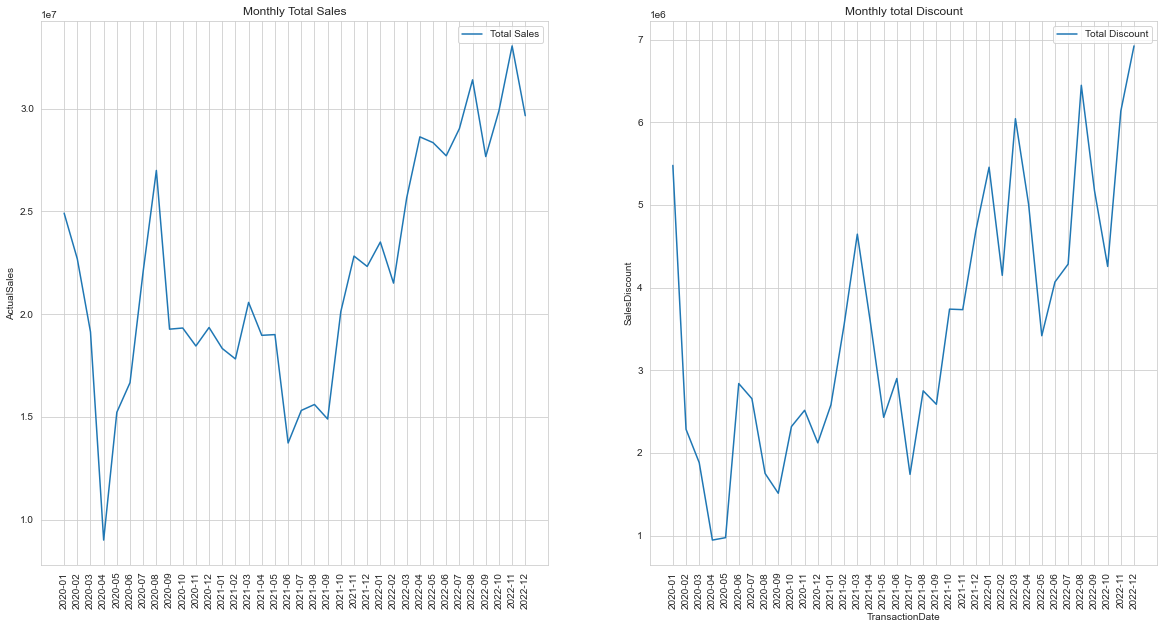

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Convert TransactionDate column to datetime format
total_products['TransactionDate'] = pd.to_datetime(total_products['TransactionDate'])

# Group by month and calculate total sales, discounts, and unit volumes
param = ['Actual sales','UnitVolume','SalesDiscount']
monthly_data = total_products.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M')).sum()
months = [str(x)[0:7] for x in monthly_data.index.to_list()]  #displaying all the months
monthly_data.reset_index(inplace=True)
monthly_data['TransactionDate'] = months 
#discounts are positive
monthly_data['SalesDiscount'].apply(lambda x: abs(x))


# Plot monthly trends
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.lineplot(x= months, y= monthly_data['ActualSales'], label='Total Sales', ax = ax[0])
ax[0].set_title('Monthly Total Sales')
ax[0].set_ylabel('ActualSales')
ax[0].set_xticklabels(labels=months, rotation=90)



sns.lineplot(x= monthly_data['TransactionDate'] , y = abs(monthly_data['SalesDiscount']), label='Total Discount', ax= ax[1])
ax[1].set_title('Monthly total Discount')
ax[1].set_ylabel('SalesDiscount')
plt.xticks(rotation=90)
ax[1].legend()
plt.xticks(rotation=90)

plt.show()





It seems to be a very high correlation between the discounts and the sales. Indeed one can see from the scatterplot below that monthly sales are positively correlated with discounts, as month recording the highest sales, had the highest amount of total discounts. For instance we refer to the plots above. Consider january of 2020, July 2022 and December 2021. In these months, it is clear that both discounts and sales have the same behaviour, for more accurate results tough, we will also look at average discounts and sales. 

<AxesSubplot:xlabel='SalesDiscount', ylabel='ActualSales'>

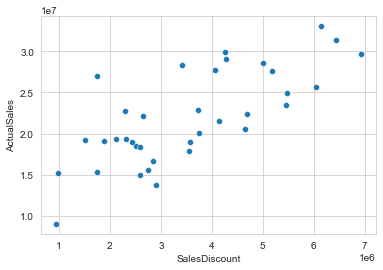

In [61]:
#again making discounts positive
monthly_data['SalesDiscount'] = monthly_data['SalesDiscount'].apply(lambda x: abs(x))
sns.scatterplot(x="SalesDiscount", y="ActualSales", data=monthly_data)


In this section we will separetely show the actual average sales per month. Again, this pretty much reflects the total sales trends of before, with March and the winter season being particularly profitable for the business. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


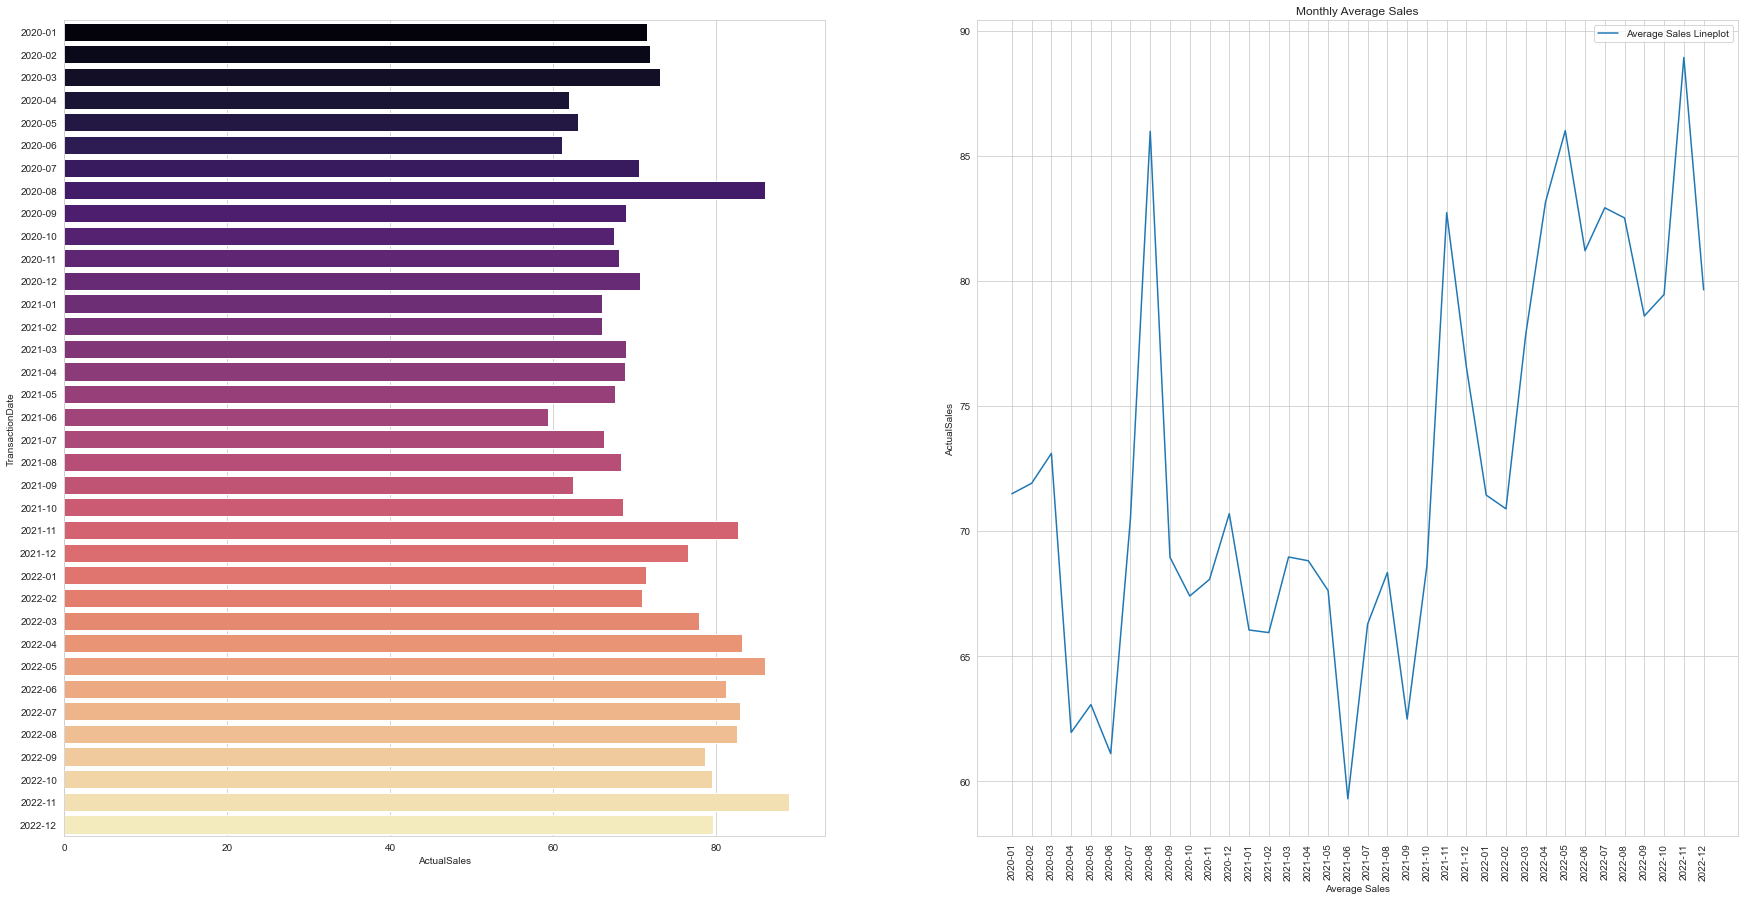

In [62]:
param = ['ActualSales','SalesDiscount','UnitVolume', 'DistributionChannel']
monthly_data_mean = total_products.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[param].mean()
 

fig, ax = plt.subplots(1, 2, figsize=(30, 15))
months = [str(x)[0:7] for x in monthly_data_mean.index.to_list()]  #displaying only the months
monthly_data_mean.reset_index(inplace=True)
monthly_data_mean['TransactionDate'] = months 

sns.barplot(data= monthly_data_mean, y = monthly_data_mean['TransactionDate'], x = monthly_data_mean['ActualSales'], label='Average Sales', orient = 'h', palette= 'magma', ax= ax[0])
plt.title('Daily Average Sales x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Sales')
plt.legend() 

sns.lineplot(x= monthly_data_mean['TransactionDate'], y= monthly_data_mean['ActualSales'], label='Average Sales Lineplot', ax = ax[1])
ax[1].set_title('Monthly Average Sales')
ax[1].set_ylabel('ActualSales');

The average sales discounts are also displayed below. The trends follows what the total aggregation told us, there is an increasing trend in both sales and discounts.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


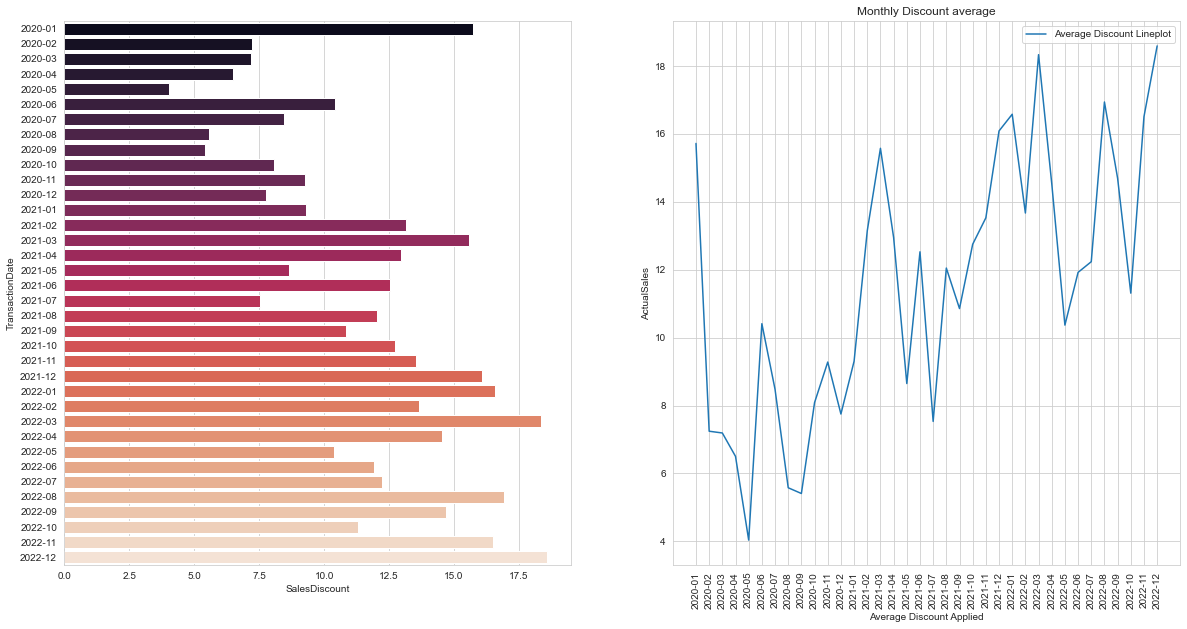

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
monthly_data_mean['SalesDiscount'] = monthly_data_mean['SalesDiscount'].apply(lambda x: abs(x))
sns.barplot(data= monthly_data_mean, y = monthly_data_mean['TransactionDate'], x = monthly_data_mean['SalesDiscount'], label='Average Discount Applied', orient="h", palette = 'rocket', ax= ax[0])

plt.title('Daily Discount x Month')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Discount Applied')
plt.legend() 


sns.lineplot(x= monthly_data_mean['TransactionDate'], y= monthly_data_mean['SalesDiscount'], label='Average Discount Lineplot', ax = ax[1])
ax[1].set_title('Monthly Discount average')
ax[1].set_ylabel('ActualSales');

Again the average confirmed what we suspected and the scatterplot , sales and promotion are likely to be positively correlated.

<AxesSubplot:xlabel='SalesDiscount', ylabel='ActualSales'>

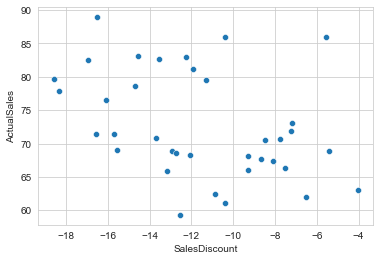

In [63]:
sns.scatterplot(x="SalesDiscount", y="ActualSales", data=monthly_data_mean)


## Online vs Offline Sales
Let us now see the main differences between online and offline sales.

In [64]:
#keys to strings
total_products['BrandKey'] , total_products['SupplierKey'] = total_products['BrandKey'].astype(str), total_products['SupplierKey'].astype(str)

In [65]:
num_cols = total_products.select_dtypes(include='number').columns.tolist()
print(num_cols)

['UnitVolume', 'ActualSales', 'SalesDiscount', 'RetailFullPrice']


In [66]:
#prepping the 2 dataframes
online_total_product = total_products[total_products['DistributionChannel'] == 'Online']
offline_total_product = total_products[total_products['DistributionChannel'] == 'Physical']

monthly_data_mean_online = online_total_product.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[num_cols].mean()
# display(monthly_data_mean_online)
monthly_data_mean_online.dropna(inplace = True)   #getting rid of months where actual sales were null (no sales)
months_1 = [str(x)[0:7] for x in monthly_data_mean_online.index.to_list()]  #displaying only the months
monthly_data_mean_online.reset_index(inplace=True)
monthly_data_mean_online['TransactionDate'] = months_1

monthly_data_mean_offline = offline_total_product.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[num_cols].mean()
# display(monthly_data_mean_online)
monthly_data_mean_offline.dropna(inplace = True)   #getting rid of months where actual sales were null (no sales)
months_2 = [str(x)[0:7] for x in monthly_data_mean_offline.index.to_list()]  #displaying only the months
#monthly_data_mean_offline.reset_index(inplace=True)
#monthly_data_mean_offline['TransactionDate'] = months_2 


In [ ]:
monthly_data_mean_offline.head(5)

Let's compare average sales sales for both. On average, it is clear that online stores are much more revenue efficient. 

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


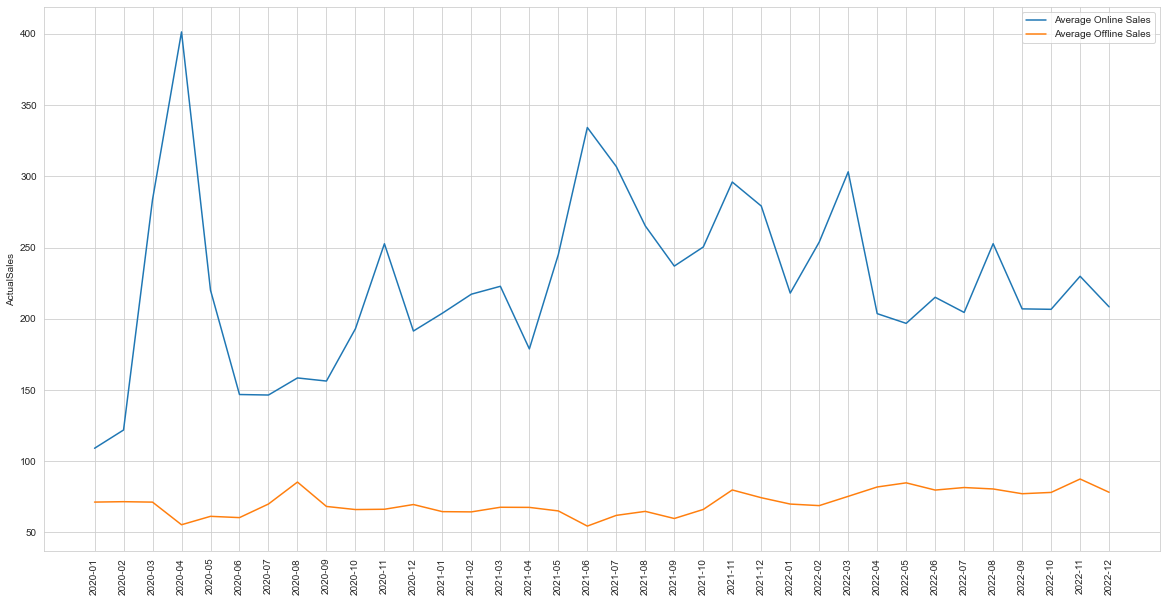

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(data= monthly_data_mean_online, x= months_1, y = monthly_data_mean_online['ActualSales'], label='Average Online Sales', palette = 'magma')
''' plt.title('Daily Average Sales x Month (Online)')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Sales')
ax[0].set_xticklabels(labels=months_1, rotation=90)  # Set rotation here
plt.legend(); '''

sns.lineplot(data= monthly_data_mean, x = months_2, y = monthly_data_mean_offline['ActualSales'], label='Average Offline Sales',  palette = 'magma')
#plt.axhline(y=2.51, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.legend()
''' plt.title('Daily Average Sales x Month (Offline)')
plt.xticks(rotation=90)
plt.ylabel('Average sales')
plt.xlabel('Months')
plt.legend() ''';

It is also interesting to see whether disxounts played a role in online products sales. Again, the lineplot below confirms our belief: discounts impact positively on sales. we also notice how stable offline discounts were when compred to online ones (especially in November, which has very high discounts). Offline stores on the othere hand, see an increase in discounts during the typical discount season (December to March). The retailer could decide to implement a more aggressive offline strategy to maximise sales.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


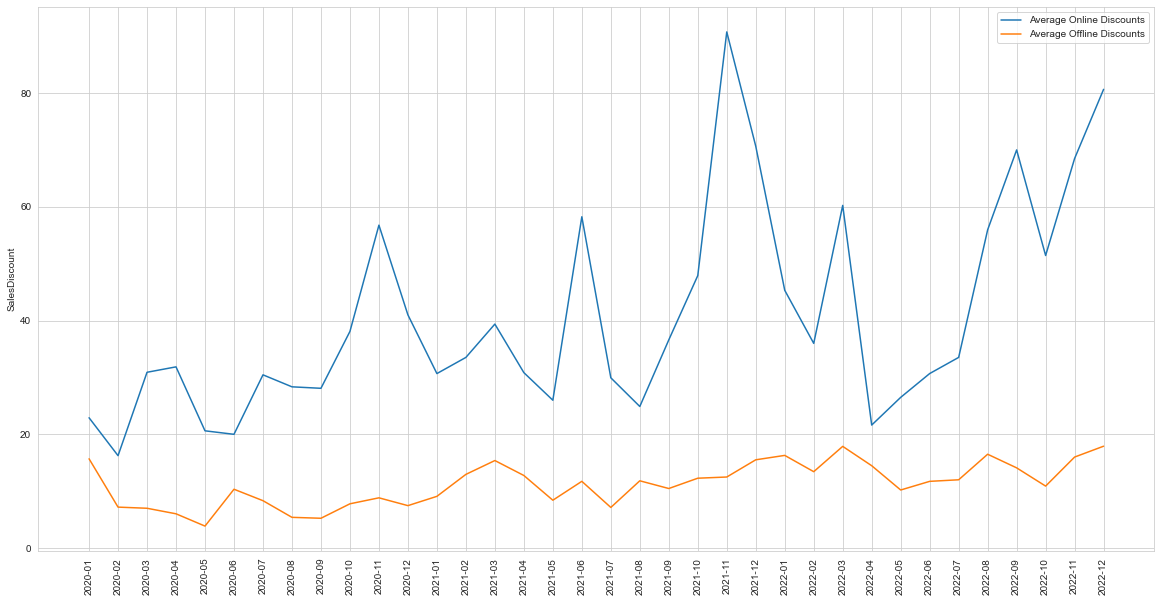

In [47]:


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(data= monthly_data_mean_online, x= months_1, y = monthly_data_mean_online['SalesDiscount'].apply(lambda x: abs(x)), label='Average Online Discounts', palette = 'magma')
''' plt.title('Daily Average Sales x Month (Online)')
plt.xticks(rotation=90)
plt.ylabel('Months')
plt.xlabel('Average Sales')
ax[0].set_xticklabels(labels=months_1, rotation=90)  # Set rotation here
plt.legend(); '''

sns.lineplot(data= monthly_data_mean, x = months_2, y = monthly_data_mean_offline['SalesDiscount'].apply(lambda x: abs(x)), label='Average Offline Discounts',  palette = 'magma')
#plt.axhline(y=2.51, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.legend()

In [136]:
#naming day to transactiondate
CPIs.columns
CPIs.rename(columns= {'Date_daily': 'TransactionDate'}, inplace=True)

We try now to create a dynamic chart to allow the user to analyze a deeper spectrum of dimensions in the data. For features selection, we will transform some features in more appropriate forms as well as addding the daily CPI.

In [137]:
total_products['TransactionDate'] = pd.to_datetime(total_products['TransactionDate'])

total_products['Date_monthly'] = total_products['TransactionDate'].dt.to_period('M')

total_products['SalesType'] = total_products['DistributionChannel'].apply(lambda x: 'Online' if x == 'Online' else 'Offline')

total_products['DiscountType'] = total_products['SalesDiscount'].apply(lambda x: 'Discounted' if x > 0 else 'Non-Discounted')

total_products['Region'] = total_products['Region_Lvl2']

total_products['SubCategory'] = total_products['ProductCategory_Lvl2']

total_products = pd.merge(total_products, CPIs, on='TransactionDate', how='left')


In [138]:
#dropping useless columns
total_products.drop(columns=['Date_monthly_y', 'CPI_monthly', 'Date_monthly_x'], inplace=True)

## Regions Sales
Let us now see if some particular trend in geographical data can be traced. We will generally see how sales vary according to the store location.
Below, we can see that most of revenue is made in the region A, given that it has the most recorded sales. Indeed when we see the average, the same happens, online sales are more profitable!

In [70]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

region_sales = total_products.groupby('Region_Lvl1')['ActualSales'].sum()
region_sales_mean = total_products.groupby('Region_Lvl1')['ActualSales'].mean()    #aggregating by mean

fig = make_subplots(rows=1, cols=2)

trace = go.Bar(
    x=region_sales.index,
    y=region_sales.values,
    name='Actual Sales',
    marker=dict(color='blue')
)

fig.add_trace(trace, row=1, col=1)

trace2 = go.Bar(
    x=region_sales_mean.index,
    y=region_sales_mean.values,
    name='Actual Sales',
    marker=dict(color='red')
)

fig.add_trace(trace2, row=1, col=2)


fig.update_layout(
    title='Total vs Average Sales by Region',
    xaxis_title='Region',
    yaxis_title='Actual Sales'
)

fig.show()



After visualizing the 3 top regions, we take a look at the region A subregions sales. Some predominant regions can be seen, and they are the nes where most sales are made.

In [71]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

regionA_sales = total_products[total_products['Region_Lvl1'] == 'RegionA']

region_sales = regionA_sales.groupby('Region_Lvl2')['ActualSales'].sum()

fig = make_subplots(rows=1, cols=1)

trace = go.Bar(
    x=region_sales.index,
    y=region_sales.values,
    name='Actual Sales',
    marker=dict(color='red')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Region',
    xaxis_title='Region A: subregions',
    yaxis_title='Actual Sales'
)

fig.show()


Now it is turn for Region B.

In [ ]:
regionB_sales = total_products[total_products['Region_Lvl1'] == 'RegionB']
# print(regionA_sales)
region_sales = regionB_sales.groupby('Region_Lvl2')['ActualSales'].sum()

fig = make_subplots(rows=1, cols=1)

trace = go.Bar(
    x=region_sales.index,
    y=region_sales.values,
    name='Actual Sales',
    marker=dict(color='green')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Total Sales by Subregion',
    xaxis_title='Region B: subregions',
    yaxis_title='Actual Sales'
)

fig.show()

We can get some insights on product categories too. First, a barplot indicating the distribution of product categories can be good.

In [ ]:
total_products['ProductCategory_Lvl2'].value_counts()

The countplot below shows the predominance of category AC products sales.

<AxesSubplot:ylabel='count'>

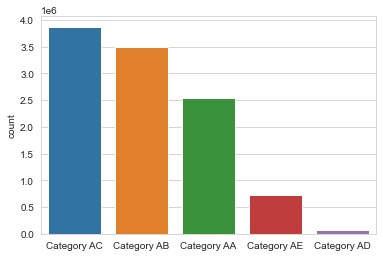

In [72]:
sns.countplot(data = total_products['ProductCategory_Lvl2'], x = total_products['ProductCategory_Lvl2'].values)


Even though total sales can be a good way to estimate the popularity of product categories, the average seems more appropriate as it takes into account the number of products belonging (sold) to each category. This barplot indeed indicates that category AC is not the most profitable category on average, but Ae is, even if by a small margin. This can be due to an higher units sold or more likely, to an higher retail full price.

In [73]:
category_mean = total_products.groupby('ProductCategory_Lvl2')['ActualSales'].mean()
# print(category_sales)

In [74]:
fig = make_subplots(rows=1, cols=1)


trace = go.Bar(
    x=category_mean.index,
    y=category_mean.values,
    name='Actual Sales',
    marker=dict(color='cyan')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title='Average Sales by Category',
    xaxis_title='Category',
    yaxis_title='Actual Sales'
)

fig.show()

The barplot below confirms that individual product prices in the category AE must cost more on average.

In [75]:
category_volume = total_products.groupby('ProductCategory_Lvl2')['RetailFullPrice'].sum()

fig = make_subplots(rows=1, cols=1)


trace = go.Bar(
    x=category_volume.index,
    y=category_volume.values,
    name='Actual Sales',
    marker=dict(color='red')
)

fig.add_trace(trace, row=1, col=1)

fig.update_layout(
    title=' Total UnitVolume by Category',
    xaxis_title='Category',
    yaxis_title='Unit Volumes'
)

fig.show()

In [ ]:
#deleting some useless data to free some memory
#do not run unless memory is insufficient!

del regionA_sales
del regionB_sales 


For our analysis, it can be also useful to look at some weekly and monthly trends over the years, to see whether certain days have better performance overall.
Preppping our data a little more would be great! We will first take a look at the CPI effect on average. This can reveal if there's a general rise of prices in specific months and eventually, what strategies could be implemented to maximise sales.

In [139]:
# Creating a dictionary to map holidays to their corresponding dates

holidays = {
    1 : "Chinese New Year's Day",
    2 : "Federal Territory Day",
    3 : 'No Holidays',
    4 : "Hari Raya Puasa (End of Ramadan)",
    5 : ["Labor Day", "Wesak Day"],
    6 : 'No Holidays',
    7 : "Hari Raya Qurban (Feast of Sacrifice)",
    8 : "National Day",
    9 : "Malaysia Day",
    10 : "Deepavali",
    11 : 'No Holidays',
    12 : ["Christmas Day","New Year's Eve"]
}



In [140]:
# Defining a function to map the month to the season
def get_season(month : int):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    


In [ ]:
#seasonality effects, intrdocuing new features
total_products['Month'] = total_products['TransactionDate'].dt.month 
total_products['Day'] = total_products['TransactionDate'].dt.day

total_products['Season'] = total_products.apply(lambda row: get_season(row['Month']), axis=1)

Below, we would like to discover some eventual implications of CPI on the products. We will first regroup some monthly data and show its trends, concentrating on seasons and CPI progression over time.

In [79]:
# integrating consumer price index

cpi_monthly = CPIs
cpi_monthly['Date_monthly'] = pd.to_datetime(cpi_monthly['Date_monthly'], format='%Y-%m')
cpi_monthly = np.array(cpi_monthly['Date_monthly'])
cpi_monthly = [str(i)[0:7] for i in cpi_monthly if str(i) != 'NaT']
# print(cpi_monthly)
cpi_2_merge = CPIs[['CPI_monthly']].dropna()
cpi_2_merge['Date_monthly'] = cpi_monthly
# print(cpi_2_merge)

monthly_data_mean = total_products.groupby(pd.Grouper(key='TransactionDate', axis=0, freq='M'))[num_cols].mean()
monthly_data_mean = monthly_data_mean.reset_index().dropna()
# print(monthly_data_mean)
monthly_dates = np.array(monthly_data_mean['TransactionDate'])
monthly_data_mean = monthly_data_mean.drop(monthly_data_mean.columns[0], axis = 1)
# display(monthly_data_mean)
monthly_sales = [str(i)[0:7] for i in monthly_dates]
monthly_data_mean['Date_monthly'] = monthly_sales
# # print(sales_2_merge)

cpi_monthly_sales = pd.merge(cpi_2_merge, monthly_data_mean, on = 'Date_monthly')
# display(cpi_monthly_sales)

In [80]:
# Add the 'season' column to the DataFrame
cpi_monthly_sales['Season'] = cpi_monthly_sales['Date_monthly'].apply(lambda x: get_season(int(x[5:7])))

# Add the holiday column to the DataFrame
holiday_mapper = lambda x: holidays[int(x[5:7])] if isinstance(holidays[int(x[5:7])], str) else ', '.join(holidays[int(x[5:7])])


cpi_monthly_sales['Holiday'] = cpi_monthly_sales['Date_monthly'].map(holiday_mapper)


# display(cpi_monthly_sales)

As we have integrated other interesting features, we are now ready to discover some implications of them. First, we will see how CPI has evolved over time, giving emphasis to each separate season.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

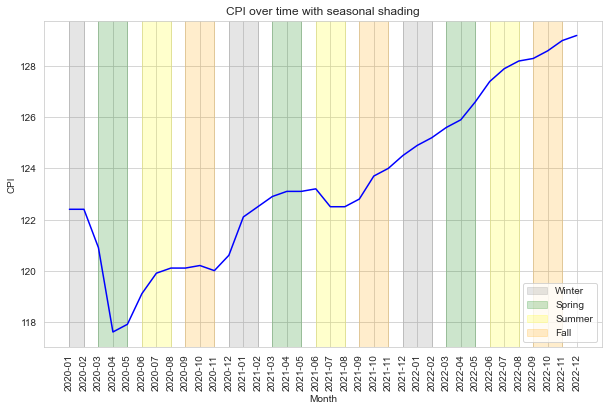

In [81]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(cpi_monthly_sales['Date_monthly'], cpi_monthly_sales['CPI_monthly'], color='blue')

# Shade the winter season
ax.axvspan('2020-01', '2020-02', alpha=0.2, color='gray', label='Winter')
ax.axvspan('2020-12', '2021-02', alpha=0.2, color='gray')
ax.axvspan('2021-12', '2022-02', alpha=0.2, color='gray')

# Shade the spring season
ax.axvspan('2020-03', '2020-05', alpha=0.2, color='green', label='Spring')
ax.axvspan('2021-03', '2021-05', alpha=0.2, color='green')
ax.axvspan('2022-03', '2022-05', alpha=0.2, color='green')

# Shade the summer season
ax.axvspan('2020-06', '2020-08', alpha=0.2, color='yellow', label='Summer')
ax.axvspan('2021-06', '2021-08', alpha=0.2, color='yellow')
ax.axvspan('2022-06', '2022-08', alpha=0.2, color='yellow')

# Shade the fall season
ax.axvspan('2020-09', '2020-11', alpha=0.2, color='orange', label='Fall')
ax.axvspan('2021-09', '2021-11', alpha=0.2, color='orange')
ax.axvspan('2022-09', '2022-11', alpha=0.2, color='orange')

# Add labels and legend
ax.set_xlabel('Month')
plt.xticks(rotation=90)
ax.set_ylabel('CPI')
ax.set_title('CPI over time with seasonal shading')
ax.legend()
plt.show()




It is interesting to see whether sales and retail full prices have moved accordingly to seasons. It is clear that products were mostly on discounts during March, November and December.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

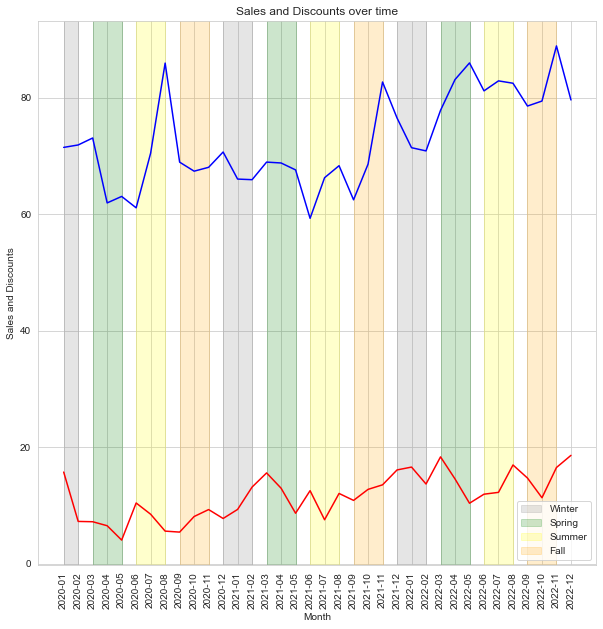

In [82]:
# Create a figure and axis object
fig, ax = plt.subplots( figsize=(10, 10))

# Plot the data, respectvely actual sales monthly average and discounts.
sns.lineplot(x = monthly_data_mean['Date_monthly'], y = monthly_data_mean['ActualSales'], color='blue', ax=ax)
sns.lineplot(x = monthly_data_mean['Date_monthly'], y = monthly_data_mean['SalesDiscount'].apply(lambda x: abs(x)), color='red', ax=ax)




ax.axvspan('2020-01', '2020-02', alpha=0.2, color='gray', label='Winter')
ax.axvspan('2020-12', '2021-02', alpha=0.2, color='gray')
ax.axvspan('2021-12', '2022-02', alpha=0.2, color='gray')

# Shade the spring season
ax.axvspan('2020-03', '2020-05', alpha=0.2, color='green', label='Spring')
ax.axvspan('2021-03', '2021-05', alpha=0.2, color='green')
ax.axvspan('2022-03', '2022-05', alpha=0.2, color='green')

# Shade the summer season
ax.axvspan('2020-06', '2020-08', alpha=0.2, color='yellow', label='Summer')
ax.axvspan('2021-06', '2021-08', alpha=0.2, color='yellow')
ax.axvspan('2022-06', '2022-08', alpha=0.2, color='yellow')

# Shade the fall season
ax.axvspan('2020-09', '2020-11', alpha=0.2, color='orange', label='Fall')
ax.axvspan('2021-09', '2021-11', alpha=0.2, color='orange')
ax.axvspan('2022-09', '2022-11', alpha=0.2, color='orange')

# Add labels and legend
ax.set_xlabel('Month')
plt.xticks(rotation=90)
ax.set_ylabel('Sales and Discounts')
ax.set_title('Sales and Discounts over time')
plt.legend()
plt.show()



Average prices indeed, reveal that some adjustments in prices were done in products, as prices rose as much as the CPI did, even though of course with less consistency.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

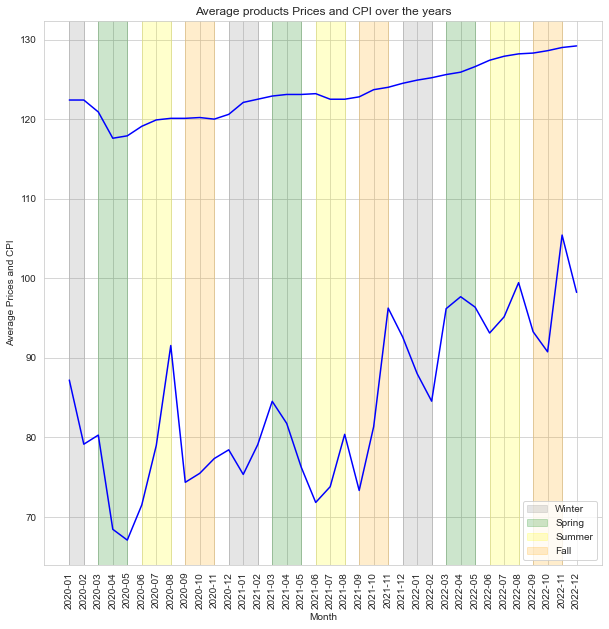

In [83]:

fig, ax = plt.subplots( figsize=(10, 10))

sns.lineplot(x = monthly_data_mean['Date_monthly'], y = monthly_data_mean['RetailFullPrice'], color='blue', ax=ax)
sns.lineplot(x = cpi_monthly_sales['Date_monthly'], y = cpi_monthly_sales['CPI_monthly'], color='blue', ax= ax)





ax.axvspan('2020-01', '2020-02', alpha=0.2, color='gray', label='Winter')
ax.axvspan('2020-12', '2021-02', alpha=0.2, color='gray')
ax.axvspan('2021-12', '2022-02', alpha=0.2, color='gray')

# Shade the spring season
ax.axvspan('2020-03', '2020-05', alpha=0.2, color='green', label='Spring')
ax.axvspan('2021-03', '2021-05', alpha=0.2, color='green')
ax.axvspan('2022-03', '2022-05', alpha=0.2, color='green')

# Shade the summer season
ax.axvspan('2020-06', '2020-08', alpha=0.2, color='yellow', label='Summer')
ax.axvspan('2021-06', '2021-08', alpha=0.2, color='yellow')
ax.axvspan('2022-06', '2022-08', alpha=0.2, color='yellow')

# Shade the fall season
ax.axvspan('2020-09', '2020-11', alpha=0.2, color='orange', label='Fall')
ax.axvspan('2021-09', '2021-11', alpha=0.2, color='orange')
ax.axvspan('2022-09', '2022-11', alpha=0.2, color='orange')

# Add labels and legend
ax.set_xlabel('Month')
plt.xticks(rotation=90)
ax.set_ylabel('Average Prices and CPI')
ax.set_title('Average products Prices and CPI over the years')
plt.legend()
plt.show()

If we instead look at weekly aggregated data, it is no surprise that Weekend days perform much better than others. The other days do not seem particularly influential on sales, except for Friday.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='DayOfWeek', ylabel='ActualSales'>

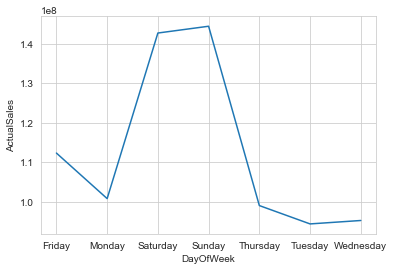

In [84]:
sns.lineplot(total_products.groupby('DayOfWeek')['ActualSales'].sum())


In [85]:
total_products.groupby('DayOfWeek')['ActualSales'].sum().head()

DayOfWeek
Friday      1.122937e+08
Monday      1.007617e+08
Saturday    1.426955e+08
Sunday      1.444140e+08
Thursday    9.899753e+07
Name: ActualSales, dtype: float64

A good way to see the effects of CPI on sales is to create a boxplot that will summarize it.

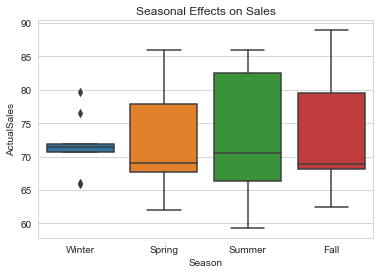

In [86]:
sns.boxplot(x='Season', y='ActualSales', data=cpi_monthly_sales)
plt.title('Seasonal Effects on Sales')
plt.show()

We can also see the effect by plotting each season average and total promotions and sales. This will give us an idea of what season has the best performance. As we can notice, the fall season has boh higher average sales and total. It is first in average discounts (that is, in average how much discount a product gets). Winter instead, has the highest sales, amd this is probably due to factors like holidays, as people are more encouraged to buy in christmas period to buy presents.

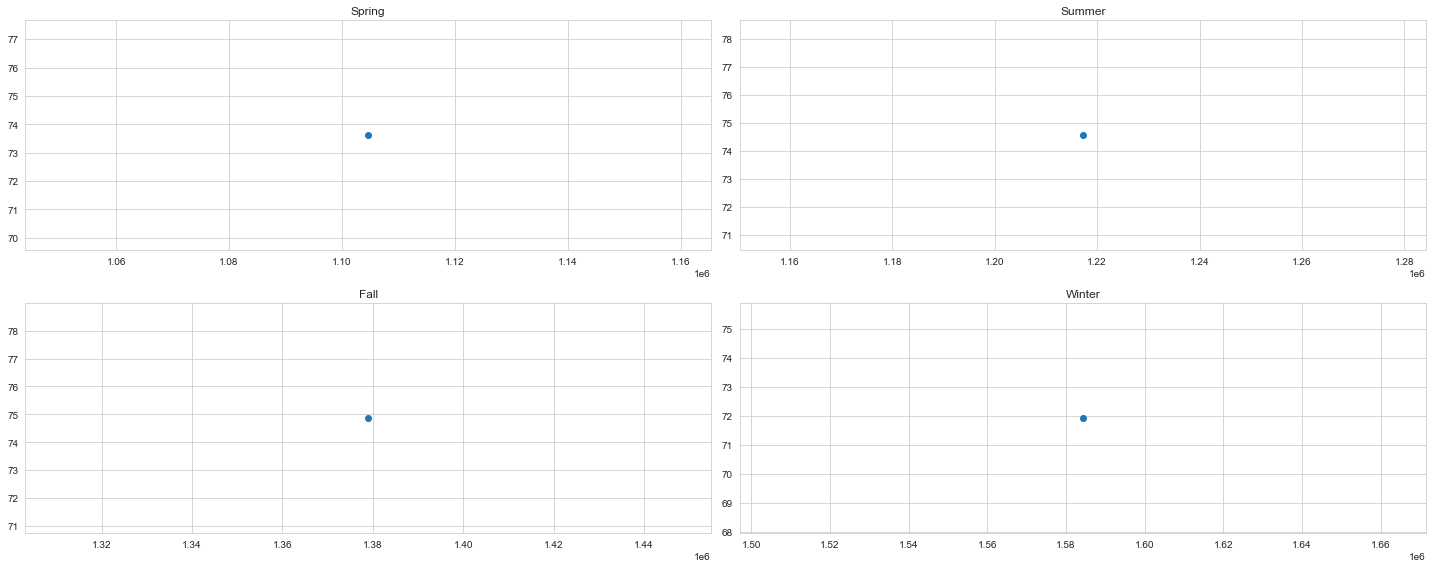

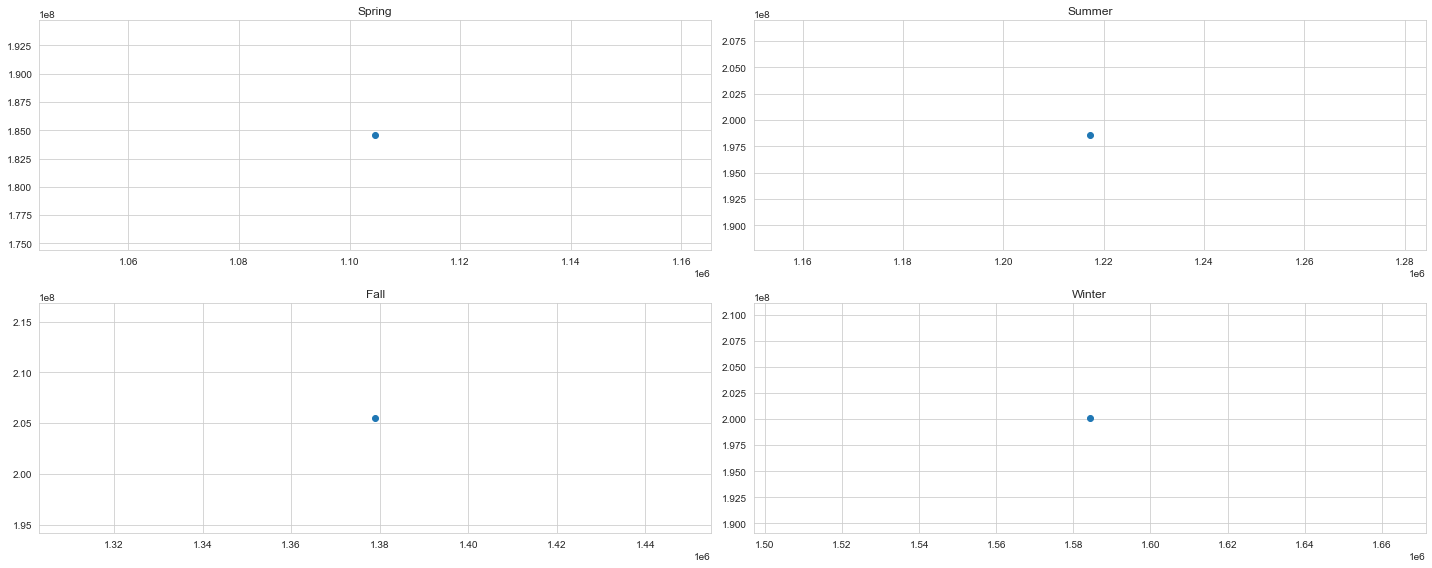

In [61]:

# split the data by season
spring_data = total_products[total_products['Season'] == 'Spring']
summer_data = total_products[total_products['Season'] == 'Summer']
fall_data = total_products[total_products['Season'] == 'Fall']
winter_data = total_products[total_products['Season'] == 'Winter']

# calculate the average sales and promotion for each season
spring_sales = spring_data['ActualSales'].mean()
spring_tot = spring_data['ActualSales'].sum()
spring_promotions = len(spring_data[spring_data['PromotionKey']  != 'No Promo'])

summer_sales = summer_data['ActualSales'].mean()
summ_tot = summer_data['ActualSales'].sum()
summer_promotions = len(summer_data[summer_data['PromotionKey']  != 'No Promo'])

fall_sales = fall_data['ActualSales'].mean()
fall_tot = fall_data['ActualSales'].sum()
fall_promotions = len(fall_data[fall_data['PromotionKey']  != 'No Promo'])

winter_tot = winter_data['ActualSales'].sum()
winter_sales = winter_data['ActualSales'].mean()
winter_promotions = len(winter_data[winter_data['PromotionKey']  != 'No Promo'])

# create the seasonal subseries plot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].scatter(spring_promotions, spring_sales)
axs[0, 0].set_title('Spring')
axs[0, 1].scatter(summer_promotions, summer_sales)
axs[0, 1].set_title('Summer')
axs[1, 0].scatter(fall_promotions, fall_sales)
axs[1, 0].set_title('Fall')
axs[1, 1].scatter(winter_promotions, winter_sales)
axs[1, 1].set_title('Winter')
plt.tight_layout()


fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].scatter(spring_promotions, spring_tot)
axs[0, 0].set_title('Spring')
axs[0, 1].scatter(summer_promotions, summ_tot)
axs[0, 1].set_title('Summer')
axs[1, 0].scatter(fall_promotions, fall_tot)
axs[1, 0].set_title('Fall')
axs[1, 1].scatter(winter_promotions, winter_tot)
axs[1, 1].set_title('Winter')
plt.tight_layout()
plt.show()



In [87]:
#again getting rid of useless variables 
#del monthly_data 
del monthly_data_mean
del monthly_data_mean_offline 
del offline_total_product 
del online_total_product 
#del productCategoryAC 
#del productKey49489
#del regionA_sales 
#del regionB_sales 


### Products Deep analysis
We now start analyzing the 4 specified products. We will first see some relevant statistics. Looking at the barplots below, we get a sense of each product performance compared to the others. Not only is product 49333 the top one in sales and unit sold, but it is also the most profitable on average, and the most discounted one. As one can easily see the products "49329" and "49340" were not on sale, and this is also reflected on the sales, as the promotions proved to be quite effective for the other 2 products' sales, as the unit solds are still slightly higher.

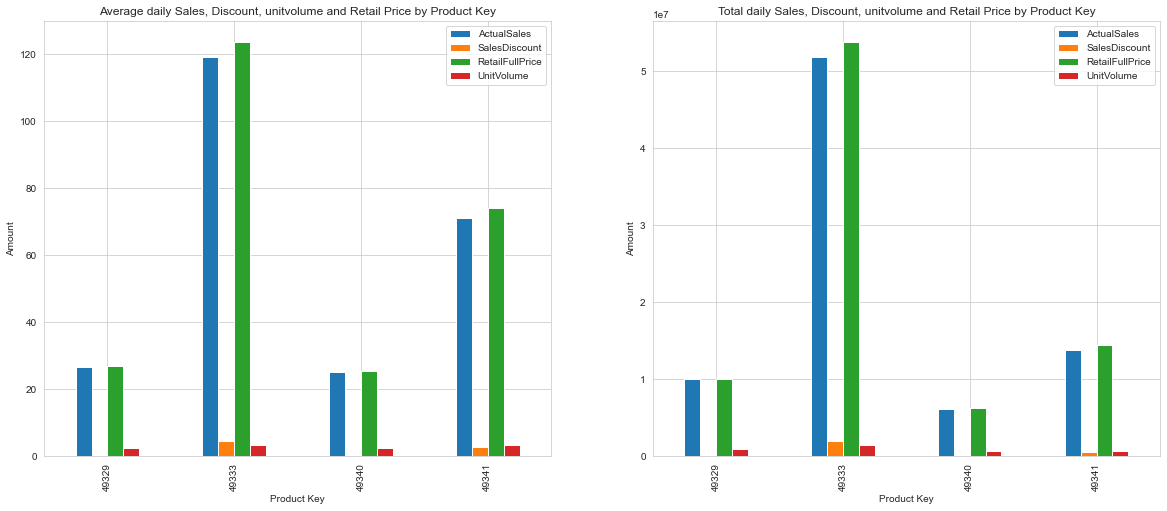

In [143]:
#order data for the sake of simplicity
total_products = total_products.sort_values(by = 'TransactionDate')
#creating the dataframe with our products.
product_keys = ['49340', '49341', '49333', '49329']
data_products = total_products[total_products['ProductKey'].isin(product_keys)]

absolute_discounts = data_products['SalesDiscount'].abs().copy()
data_products.loc[:, 'SalesDiscount'] = absolute_discounts

# Group the data by product key and aggregate the sales, discount, and retail price columns
data_products['SalesDiscount'] = abs(data_products['SalesDiscount'])

df_grouped = data_products.groupby(['ProductKey']).agg({'ActualSales': 'mean', 'SalesDiscount': 'mean', 'RetailFullPrice': 'mean', 'UnitVolume': 'mean'})
df_grouped2 = data_products.groupby(['ProductKey']).agg({'ActualSales': 'sum', 'SalesDiscount': 'sum', 'RetailFullPrice': 'sum', 'UnitVolume': 'sum'})
# Create the bar chart
fig, ax = plt.subplots(1,2, figsize=(20, 8))

df_grouped.plot(kind='bar', ax=ax[0])
df_grouped2.plot(kind = 'bar', ax= ax[1])

ax[0].set_xlabel('Product Key')
ax[0].set_ylabel('Amount')
ax[0].set_title('Average daily Sales, Discount, unitvolume and Retail Price by Product Key')  

ax[1].set_xlabel('Product Key')
ax[1].set_ylabel('Amount')
ax[1].set_title('Total daily Sales, Discount, unitvolume and Retail Price by Product Key')

plt.show()

The thetagrid lets us appreciate how predominant the product 49333 is compared to the others.

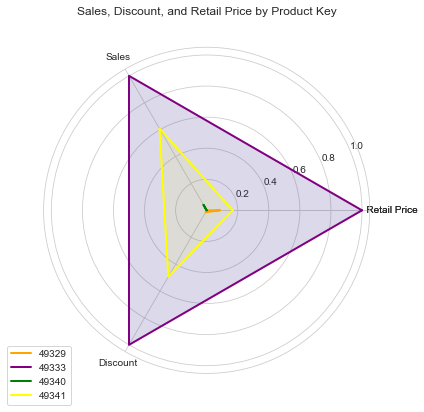

In [90]:
df_grouped = data_products.groupby(['ProductKey']).agg({'ActualSales': 'sum', 'SalesDiscount': 'mean', 'RetailFullPrice': 'mean'})
df_norm = (df_grouped - df_grouped.min()) / (df_grouped.max() - df_grouped.min())
# print(df_norm)


categories = ['Sales', 'Discount', '      Retail Price']
N = len(categories)
categories.insert(0, '')


angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Define the colors to use
colors = ['orange', 'purple', 'green', 'yellow', '']

# Loop over each row of the normalized dataframe and plot a polygon
for i in range(len(df_norm)):
    values = df_norm.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=df_norm.index[i], color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])
    
ax.fill(angles, [1]*(N + 1), alpha=0.1)
ax.set_thetagrids(angles * 180/np.pi, categories)
ax.set_title('Sales, Discount, and Retail Price by Product Key', y=1.08)
ax.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.show()


The plot below shows the monthly sales for each product, so that we can identify some trends and seasonality.

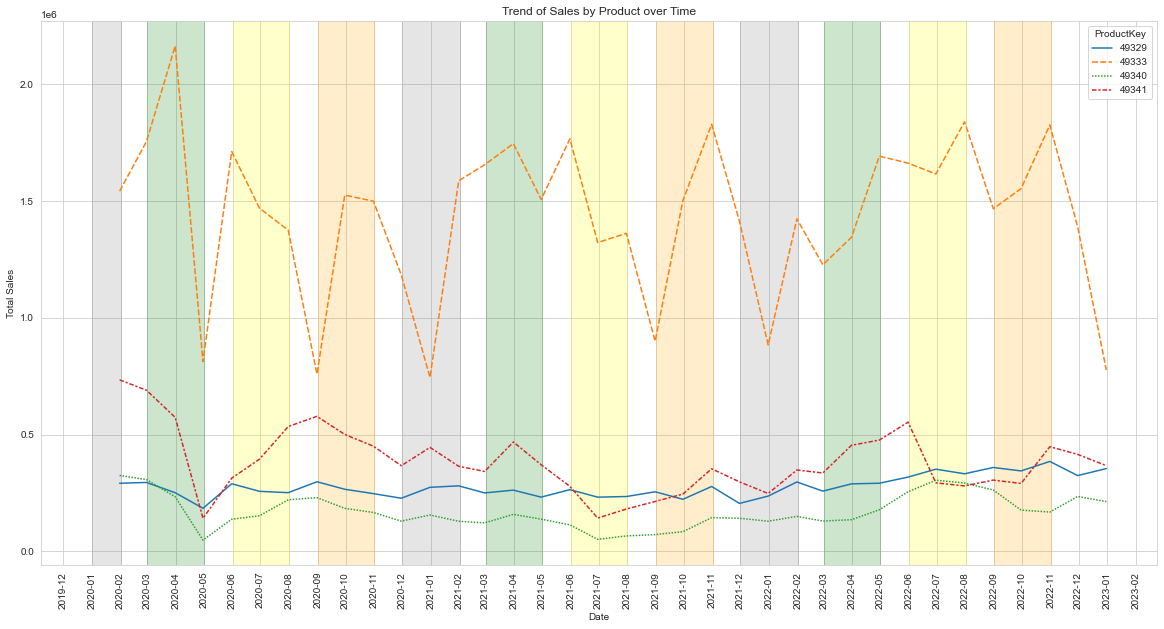

In [91]:
import matplotlib.dates as mdates 
# Aggregate the data by product month
data_products['TransactionDate'] = pd.to_datetime(data_products['TransactionDate'])
product_monthly = data_products.groupby([pd.Grouper(key = 'TransactionDate', freq = 'M'), 'ProductKey']).sum()

# Calculate the total sales for each product
sales_by_product = product_monthly['ActualSales'].unstack()
#sales_by_product['Date'] = pd.to_datetime(sales_by_product.index)

# Plot the trend of sales for each product over time
fig, ax = plt.subplots(1,1, figsize = (20, 10))
sns.lineplot(sales_by_product,  legend = True)
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)

#seasons
ax.axvspan('2020-01', '2020-02', alpha=0.2, color='gray', label='Winter')
ax.axvspan('2020-12', '2021-02', alpha=0.2, color='gray')
ax.axvspan('2021-12', '2022-02', alpha=0.2, color='gray')

# Shade the spring season
ax.axvspan('2020-03', '2020-05', alpha=0.2, color='green', label='Spring')
ax.axvspan('2021-03', '2021-05', alpha=0.2, color='green')
ax.axvspan('2022-03', '2022-05', alpha=0.2, color='green')

# Shade the summer season
ax.axvspan('2020-06', '2020-08', alpha=0.2, color='yellow', label='Summer')
ax.axvspan('2021-06', '2021-08', alpha=0.2, color='yellow')
ax.axvspan('2022-06', '2022-08', alpha=0.2, color='yellow')

# Shade the fall season
ax.axvspan('2020-09', '2020-11', alpha=0.2, color='orange', label='Fall')
ax.axvspan('2021-09', '2021-11', alpha=0.2, color='orange')
ax.axvspan('2022-09', '2022-11', alpha=0.2, color='orange')

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Trend of Sales by Product over Time")
plt.show()

Seasonality can be captured here. Look for instance at product "49333". It is clear that sales have always dropped in September and picked in November. One can also see the effect of promotions on them.

#### Promotion threshold
Since there were some data quality issues and variation in selling prices, we consider a product "on promotion", every product having the sales discount greater than 5% of the daily retail full price. For the products below this threshold, we will change their actual sales by replacing it with the retail full price.

In [144]:
# Define the promotional threshold
promo_threshold = 0.05
total_products['SalesPercentage'] = abs(total_products['SalesDiscount']) / total_products['RetailFullPrice']

# Identify the promotional transactions
promotional_transactions = total_products['SalesPercentage'] >= promo_threshold

# Create the PromotionFlag column
total_products['PromotionFlag'] = promotional_transactions.astype(int)

# Adjust actual sales for non-promotional products
mask_non_promo = total_products['SalesPercentage'] < promo_threshold
total_products.loc[mask_non_promo, 'ActualSales'] = total_products.loc[mask_non_promo, 'RetailFullPrice']
total_products.loc[mask_non_promo, 'SalesDiscount'] = total_products.loc[mask_non_promo, 'RetailFullPrice'] - total_products.loc[mask_non_promo, 'ActualSales']

display(total_products.head(10))
...

TransactionDate DayOfWeek WeekendFlag StoreKey ProductKey  UnitVolume  \
5278593      2020-01-02  Thursday       False      561      49330         1.0   
1408272      2020-01-02  Thursday       False      488      94310         2.0   
4339499      2020-01-02  Thursday       False      178      59999         1.0   
9786154      2020-01-02  Thursday       False        5      26844         4.0   
1408122      2020-01-02  Thursday       False      488      78912         1.0   
7095436      2020-01-02  Thursday       False      193      49495         1.0   
9593690      2020-01-02  Thursday       False      354      49328         1.0   
4850893      2020-01-02  Thursday       False      401      39983         1.0   
661007       2020-01-02  Thursday       False      122      49492         1.0   
1406444      2020-01-02  Thursday       False      488      49490         3.0   

         ActualSales  SalesDiscount  RetailFullPrice  BrandKey  ...  \
5278593     52.20270        0.00000          52.2027      3521  ...   
1408272     40.60210      -17.40090          58.0030      3521  ...   
4339499     82.57518       -9.17502          91.7502      3521  ...   
9786154     81.20420      -34.80180         116.0060      3521  ...   
1408122     41.12940        0.00000          41.1294      3521  ...   
7095436     20.30105       -8.70045          29.0015      3521  ...   
9593690     32.16530        0.00000          32.1653      3521  ...   
4850893     18.45550        0.00000          18.4555      3521  ...   
661007      20.30105       -8.70045          29.0015      3521  ...   
1406444     60.90315      -26.10135          87.0045      3521  ...   

         PromotionEndDate SalesPercentage PromotionFlag SalesType  \
5278593          No Promo             0.0             0   Offline   
1408272         2/10/2020             0.3             1   Offline   
4339499         2/10/2020             0.1             1   Offline   
9786154         2/10/2020             0.3             1   Offline   
1408122          No Promo             0.0             0   Offline   
7095436         2/10/2020             0.3             1   Offline   
9593690          No Promo             0.0             0   Offline   
4850893          No Promo             0.0             0   Offline   
661007          2/10/2020             0.3             1   Offline   
1406444         2/10/2020             0.3             1   Offline   

           DiscountType      Region  SubCategory CPI_daily Month Day  
5278593  Non-Discounted  Region 143  Category AC     122.4     1   2  
1408272  Non-Discounted    Region 2  Category AB     122.4     1   2  
4339499  Non-Discounted    Region 2  Category AC     122.4     1   2  
9786154  Non-Discounted   Region 67  Category AB     122.4     1   2  
1408122  Non-Discounted    Region 2  Category AE     122.4     1   2  
7095436  Non-Discounted   Region 31  Category AB     122.4     1   2  
9593690  Non-Discounted   Region 37  Category AC     122.4     1   2  
4850893  Non-Discounted  Region 206  Category AA     122.4     1   2  
661007   Non-Discounted  Region 184  Category AB     122.4     1   2  
1406444  Non-Discounted    Region 2  Category AB     122.4     1   2  

[10 rows x 30 columns]

Ellipsis

The code below will show the distribution of promotions over the months. December and January top the ranking over the years, with March and October catching up.

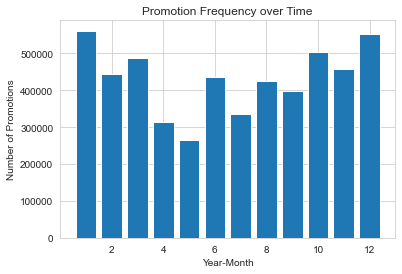

In [93]:
promo_month = total_products.groupby('Month')['PromotionFlag'].sum()
plt.bar(promo_month.index, promo_month.values)
plt.xlabel('Year-Month')
plt.ylabel('Number of Promotions')
plt.title('Promotion Frequency over Time')

plt.show()

## Product 49333 analysis. 
The top product. Below, we get a sense of the prodcut performance overtime. 

In [94]:
#extracting general info 
p_49333 = total_products[(total_products['ProductKey'] == '49333') & (total_products['SalesType'] == 'Offline')]

print(f"The product 4933 represents {(len(p_49333)/len(total_products))*100} % of the retailer products sales. Its revenues amount to { p_49333['ActualSales'].sum()}. ")
p_49333.describe()

The product 4933 represents 4.039231226804583 % of the retailer products sales. Its revenues amount to 52580990.451189995. 


UnitVolume    ActualSales  SalesDiscount  RetailFullPrice  \
count  432072.000000  432072.000000       432072.0    432072.000000   
mean        3.031539     121.694973            0.0       121.694973   
std         2.681066     107.097340            0.0       107.097340   
min         1.000000      11.231490            0.0        11.231490   
25%         1.000000      41.656700            0.0        41.656700   
50%         2.000000      83.313400            0.0        83.313400   
75%         4.000000     166.626800            0.0       166.626800   
max        58.000000    2171.421400            0.0      2171.421400   

       CPI_monthly      CPI_daily          Month            Day  \
count          0.0  432072.000000  432072.000000  432072.000000   
mean           NaN     123.712575       6.360877      15.697432   
std            NaN       3.258731       3.387253       8.861755   
min            NaN     117.600000       1.000000       1.000000   
25%            NaN     120.951724       3.000000       8.000000   
50%            NaN     123.100000       6.000000      16.000000   
75%            NaN     126.460000       9.000000      23.000000   
max            NaN     129.683871      12.000000      31.000000   

       SalesPercentage  PromotionFlag  
count    432072.000000  432072.000000  
mean          0.033184       0.272818  
std           0.056794       0.445409  
min           0.000000       0.000000  
25%           0.000000       0.000000  
50%           0.000000       0.000000  
75%           0.075949       1.000000  
max           0.974684       1.000000

Let's see again how promotions were distributed for this product! As we can see March was the most popular month for promotions.

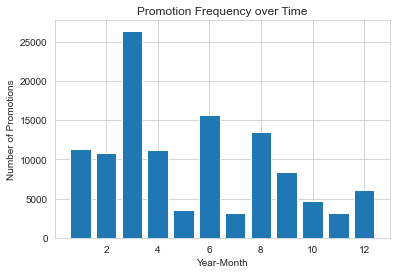

In [95]:
promo_49333 = p_49333.groupby('Month')['PromotionFlag'].sum()
plt.bar(promo_49333.index, promo_49333.values)
plt.xlabel('Year-Month')
plt.ylabel('Number of Promotions')
plt.title('Promotion Frequency over Time')

plt.show()

## ProductInsights: A class that extract useful product insights.
Let us define a reusable function that extracts intersting knowledge on each product. This can be used by analysts to get a very broad and general idea about its performance, the only things require are the product key and the feature we want to look into.

In [ ]:

class ProductInsights:
    
    def __init__(self, data, productkey):
        self.data = data[data['SalesType'] == 'Offline']   #including offline data only
        self.productkey = productkey
        self.product_data = self.data[(self.data['ProductKey'] == self.productkey) & (self.data['SalesType'] == 'Offline')]
    
    def summary(self):
        print("Summary for product", self.productkey)
        print("Total Sales: ", self.product_data['ActualSales'].sum())
        print("Total Units Sold: ", self.product_data['UnitVolume'].sum())
        print("Average Retail Price: ", self.product_data['RetailFullPrice'].mean())
        print(f"The product 4933 represents {(len(self.product_data)/len(total_products))*100} % of the retailer transaction sales. Its revenues amount to { self.product_data['ActualSales'].sum()}. ")
        print(f"The product belongs to the category {self.product_data['ProductCategory_Lvl2']}")
        self.product_data.describe()
        
    def visualize_trends(self, feature):
        fig, ax = plt.subplots(figsize=(10,6))
        data_month = self.product_data.groupby(pd.Grouper(key='TransactionDate', freq='M'))
        ax.plot(data_month['TransactionDate'].first(), data_month[feature].mean())
        ax.set_xlabel('Date')
        ax.set_ylabel(feature)
        ax.set_title(feature + " over time for product " + str(self.productkey))
        plt.show()
        
    def top_stores(self, n=5):
        store_sales = self.product_data.groupby('StoreKey')['ActualSales'].sum()
        store_sales = store_sales.sort_values(ascending=False)[:n]
        fig, ax = plt.subplots(figsize=(10,6))
        ax.bar(store_sales.index, store_sales.values)
        ax.set_xlabel('Store Key')
        ax.set_ylabel('Total Sales')
        ax.set_title('Top ' + str(n) + ' Stores for product ' + str(self.productkey))
        plt.show()
        
    def compare_categories(self, category_feature):
        
        product_sales = self.product_data.groupby(pd.Grouper(key='TransactionDate', freq='M'))['ActualSales'].mean()
        # Calculate average sales for category by month
        category = self.product_data['ProductCategory_Lvl2'].iloc[0] 
        print(category)
        category_sales = self.data[self.data['ProductCategory_Lvl2'] == str(category)].groupby(pd.Grouper(key='TransactionDate', freq='M'))['ActualSales'].mean()

        # Create line chart
        fig, ax = plt.subplots(1,1 ,figsize=(20, 15))
        ax.plot( category_sales.index, category_sales.values, label='Category', color = 'red')
        ax.plot( product_sales.index, product_sales.values, label='Product', color = 'green')

        ax.set_xlabel('Month')
        ax.set_ylabel('Average Sales')
        #ax.xticks(rotation = 90)
        ax.set_title(f'Average Sales Comparison for Product {self.productkey} in Category {category}')
        ax.legend()
        plt.show()

    def sales_by_month(self):
        month_sales = self.product_data.groupby('Month')[['ActualSales', 'RetailFullPrice']].sum()
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(month_sales.index, month_sales['ActualSales'], label='ActualSales')
        ax.plot(month_sales.index, month_sales['RetailFullPrice'], label='RetailFullPrice')
        ax.set_xlabel('Month')
        ax.set_ylabel('Total Sales')
        ax.set_title('Sales by Month for product ' + str(self.productkey))
        ax.legend()
        plt.show()
        
    def sales_by_season(self):
        season_sales = self.product_data.groupby('Season')[['ActualSales', 'RetailFullPrice']].sum()
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(season_sales.index, season_sales['ActualSales'], label='ActualSales')
        ax.plot(season_sales.index, season_sales['RetailFullPrice'], label='RetailFullPrice')
        ax.set_xlabel('Season')
        ax.set_ylabel('Total Sales')
        ax.set_title('Sales by Season for product ' + str(self.productkey))
        ax.legend()
        plt.show()

    def discounts_distribution(self):
        sns.catplot(data= self.product_data, x= "Month", y= "ActualSales", hue="PromotionFlag")

    def promo_period(self):
        fig, ax = plt.subplots(1,1, figsize = (10,10))
        promo_data = self.product_data.groupby(pd.Grouper(key="TransactionDate", freq='D'))['PromotionFlag'].sum()
        sns.lineplot(data = promo_data, x = promo_data.index, y = promo_data.values, ax = ax)
        ax.set_xlabel('Month')
        ax.set_ylabel('Total promo')
        ax.set_title('Daily Promo for product ' + str(self.productkey))
        ax.legend()
        plt.show()



    

    
product_key = str(input("Pick the product ey you want to look into: ")) 
proddata = data_products[data_products['ProductKey'] == product_key]
insights = ProductInsights(data = total_products , productkey = product_key)
insights.summary()
insights.visualize_trends('ActualSales')
insights.top_stores(n=10)  #choose the n you want
insights.compare_categories('ProductCategory_Lvl2')
insights.sales_by_season()
insights.sales_by_month()
insights.promo_period()
insights.discounts_distribution()

## Product 49340
Below, some insights about this product can be taken away. It seems clear that the lack of promos and discounts caused un underperformance of it, remarking again the importance of discounts. 

Summary for product 49340
Total Sales:  6210613.380190001
Total Units Sold:  585717.0
Average Retail Price:  25.407724577152493
The product 4933 represents 2.2851321136700795 % of the retailer transaction sales. Its revenues amount to 6210613.380190001. 
The product belongs to the category 5670359     Category AA
10525106    Category AA
1994434     Category AA
7686321     Category AA
4856171     Category AA
               ...     
6478074     Category AA
4087989     Category AA
7391611     Category AA
4072637     Category AA
10170252    Category AA
Name: ProductCategory_Lvl2, Length: 244438, dtype: object


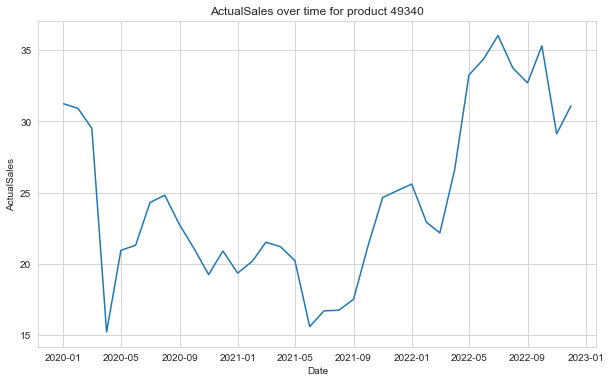

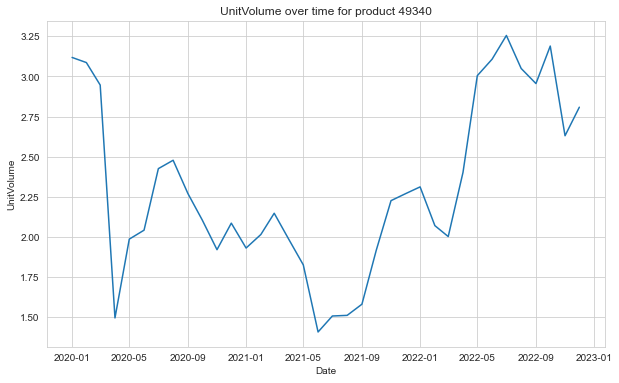

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


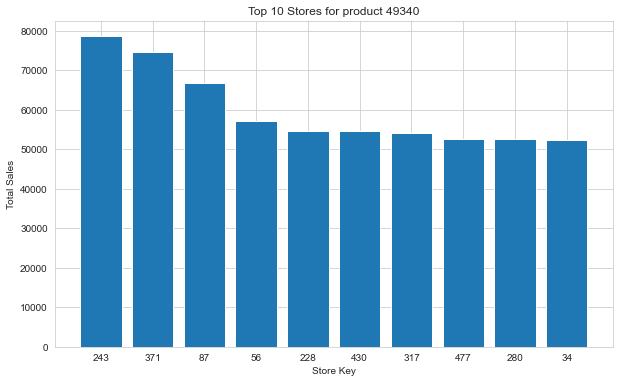

Category AA


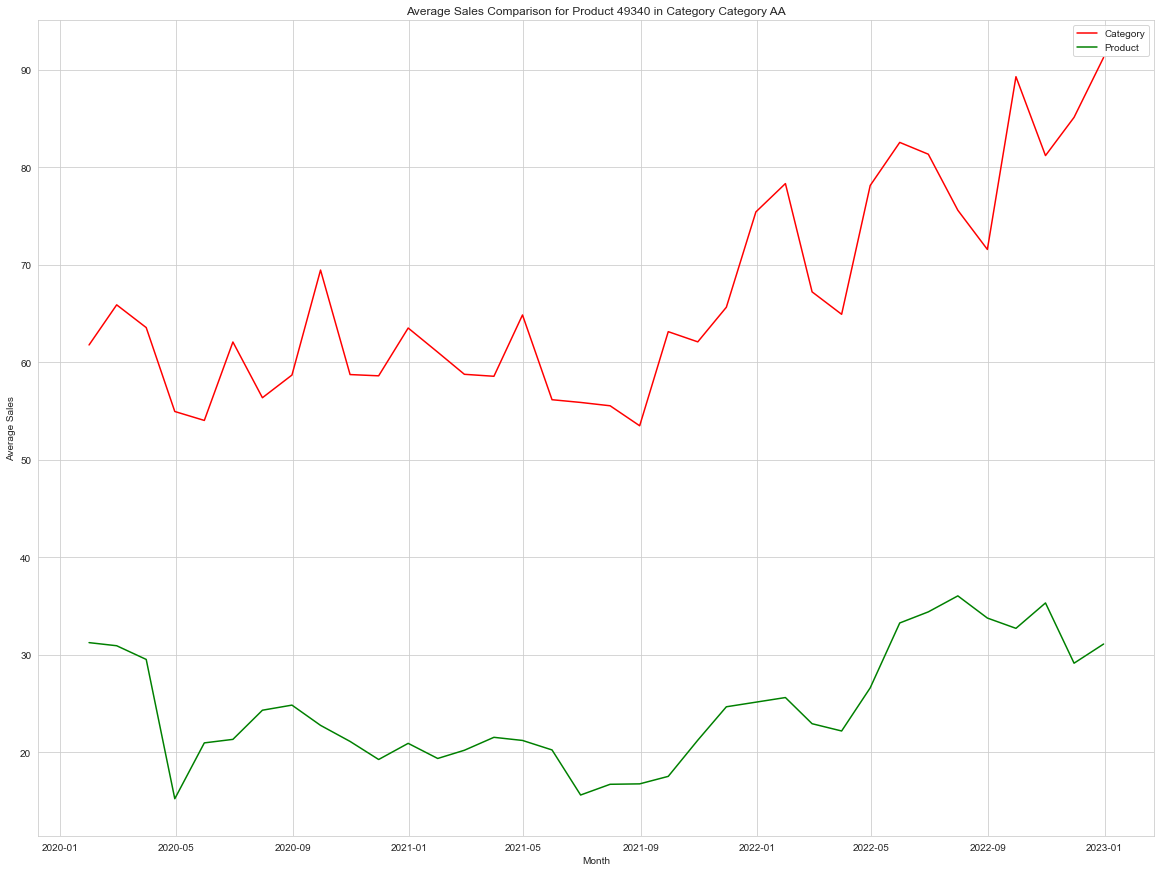

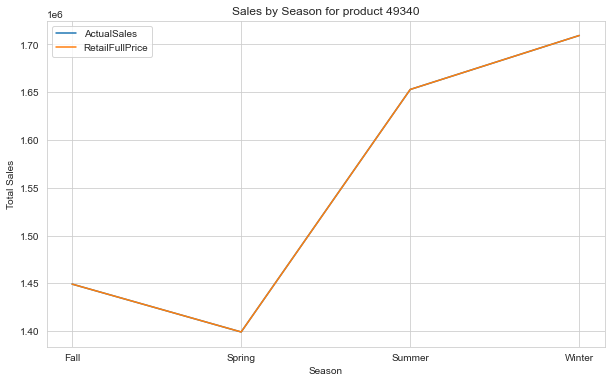

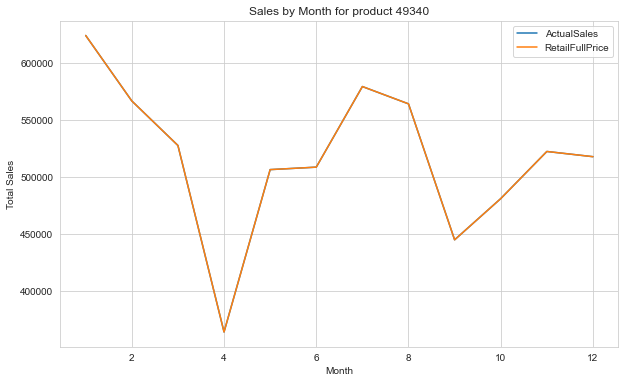

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


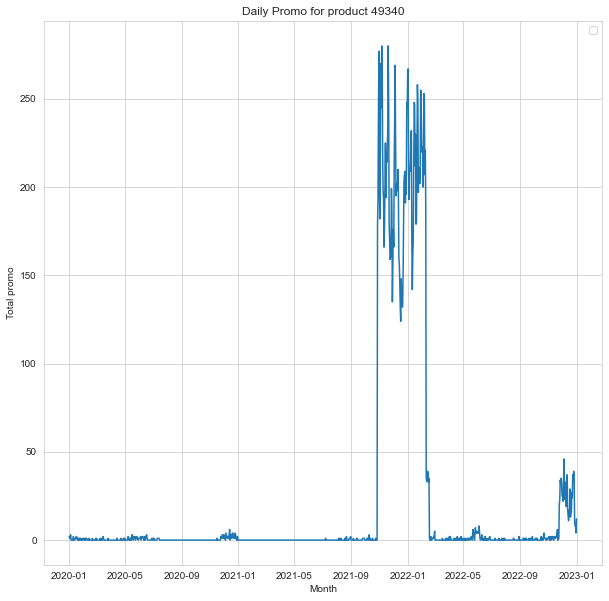

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


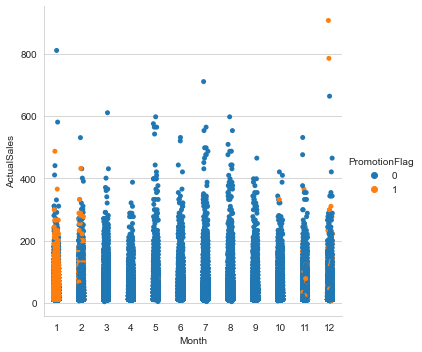

In [104]:
product_key = str(input("Pick the product ey you want to look into: ")) 
proddata = data_products[data_products['ProductKey'] == product_key]
insights = ProductInsights(data = total_products , productkey = product_key)
insights.summary()
insights.visualize_trends('ActualSales')
insights.visualize_trends('UnitVolume')

insights.top_stores(n=10)  #choose the n you want
insights.compare_categories('ProductCategory_Lvl2')
insights.sales_by_season()
insights.sales_by_month()
insights.promo_period()
insights.discounts_distribution()

## Product 49341
The product seems to perform well, and can be taken as benchmark for the retailer behaviour and strategy for its sales. 

Summary for product 49341
Total Sales:  13477675.843290001
Total Units Sold:  580769.0
Average Retail Price:  70.38428636560185
The product 4933 represents 1.7901189383415943 % of the retailer transaction sales. Its revenues amount to 13477675.843290001. 
The product belongs to the category 3568966    Category AA
8655313    Category AA
2335729    Category AA
626869     Category AA
8370827    Category AA
              ...     
8553219    Category AA
6474609    Category AA
8270156    Category AA
342685     Category AA
4067950    Category AA
Name: ProductCategory_Lvl2, Length: 191487, dtype: object


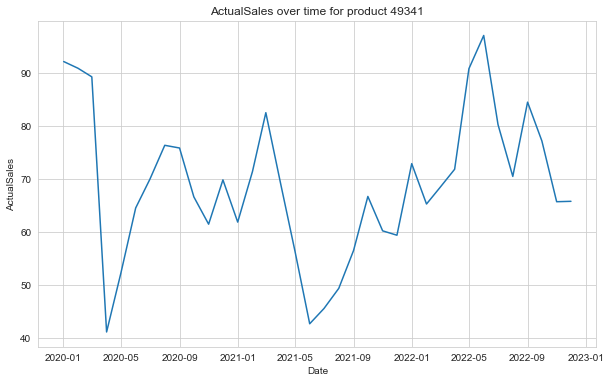

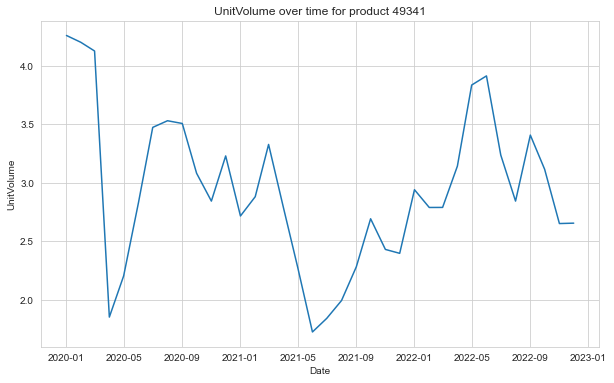

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


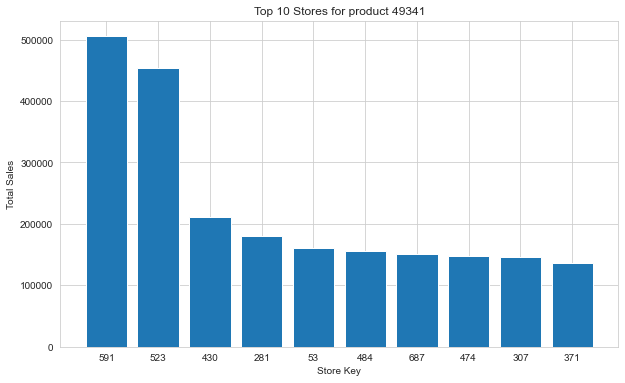

Category AA


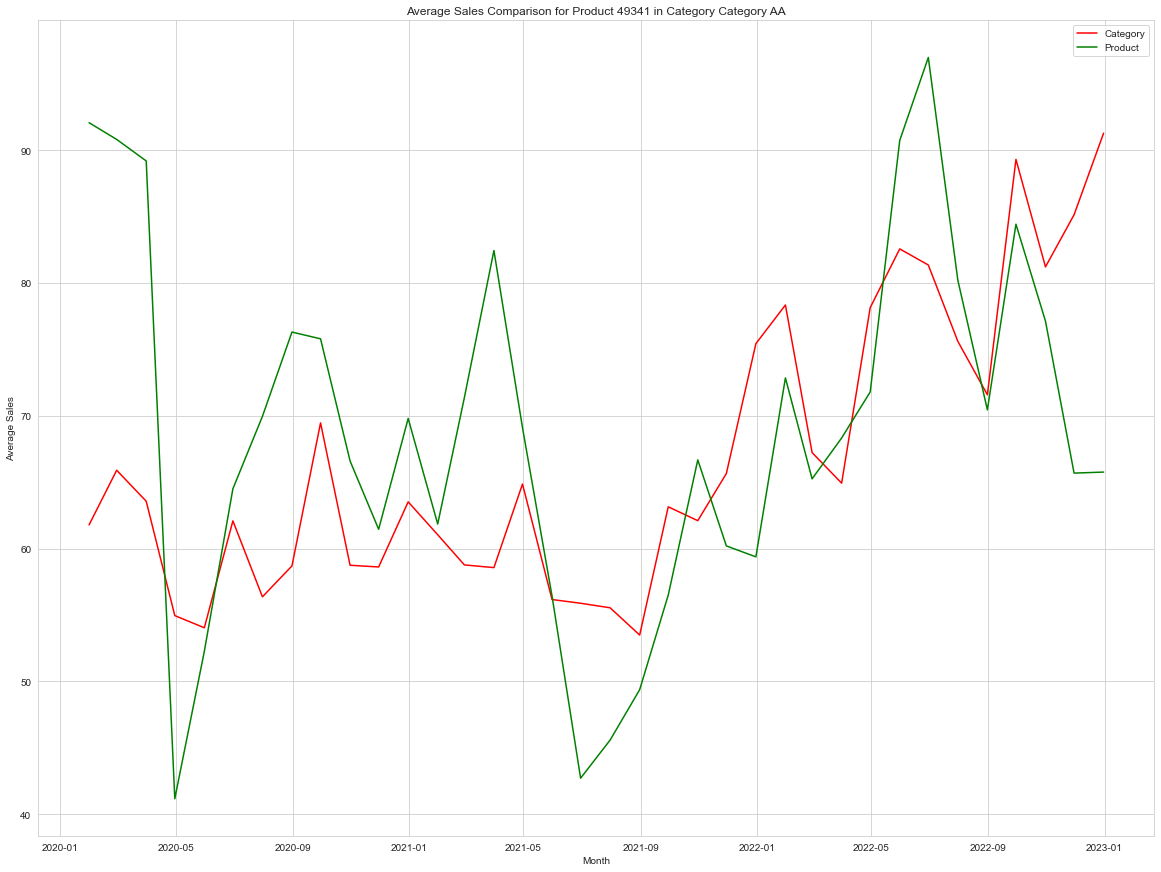

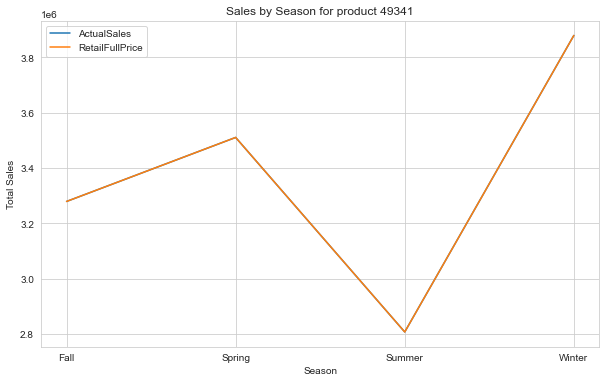

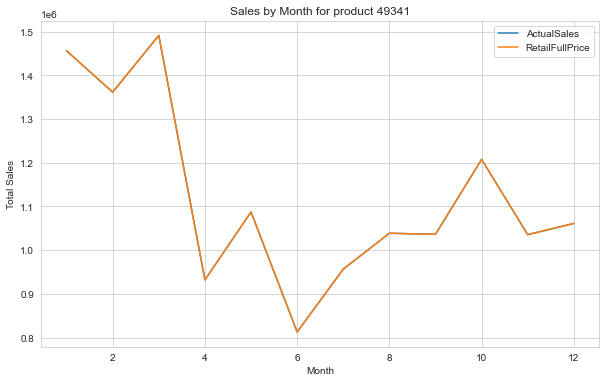

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


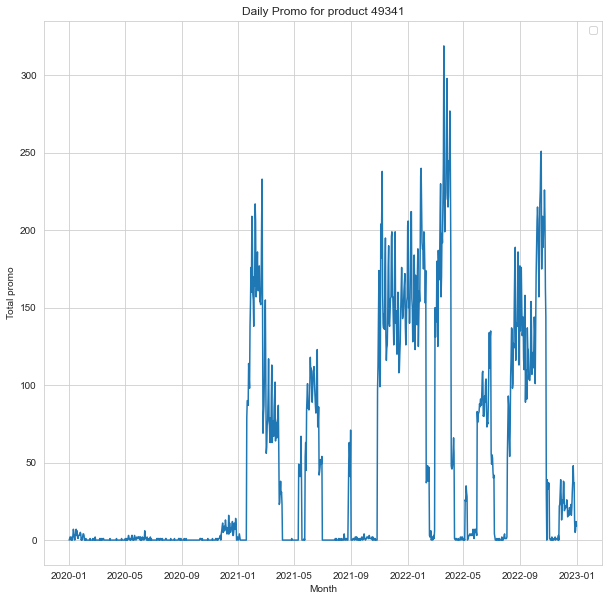

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


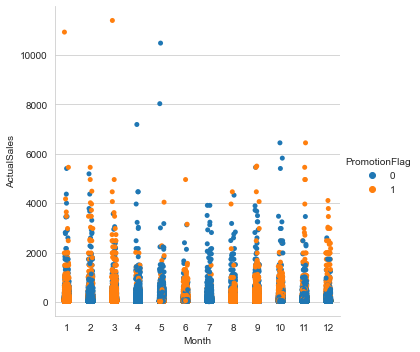

In [105]:
product_key = str(input("Pick the product you want to look into: ")) 
proddata = data_products[data_products['ProductKey'] == product_key]
insights = ProductInsights(data = total_products , productkey = product_key)
insights.summary()
insights.visualize_trends('ActualSales')
insights.visualize_trends('UnitVolume')

insights.top_stores(n=10)  #choose the n you want
insights.compare_categories('ProductCategory_Lvl2')
insights.sales_by_season()
insights.sales_by_month()
insights.promo_period()
insights.discounts_distribution()

## Product 49329
This product behaviour is very similar to what 49340 was. Still, it is the worst performer in the 4, recording the least sales and underperforming to its category by quite a good margin.

Summary for product 49329
Total Sales:  9688859.191060003
Total Units Sold:  846194.0
Average Retail Price:  26.075882461863912
The product 4933 represents 4.039231226804583 % of the retailer transaction sales. Its revenues amount to 9688859.191060003. 
The product belongs to the category 1993695    Category AC
7686116    Category AC
8931769    Category AC
7980856    Category AC
3216184    Category AC
              ...     
6499052    Category AC
4060292    Category AC
4071722    Category AC
2809899    Category AC
1064207    Category AC
Name: ProductCategory_Lvl2, Length: 371564, dtype: object


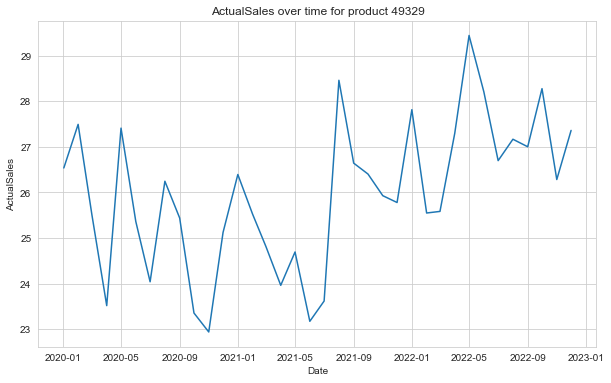

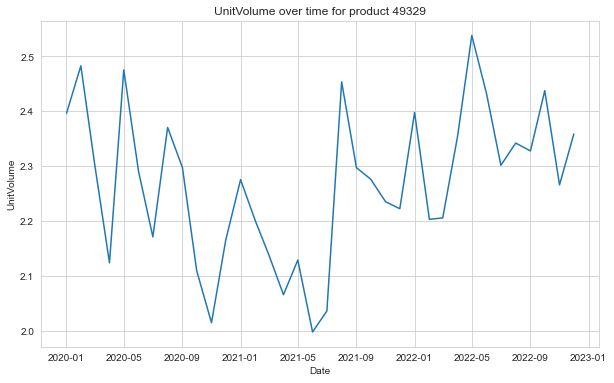

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


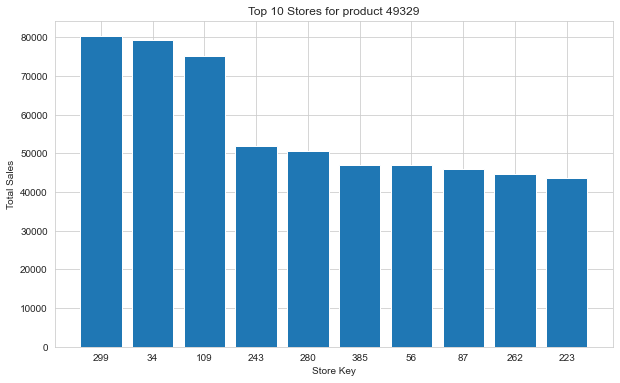

Category AC


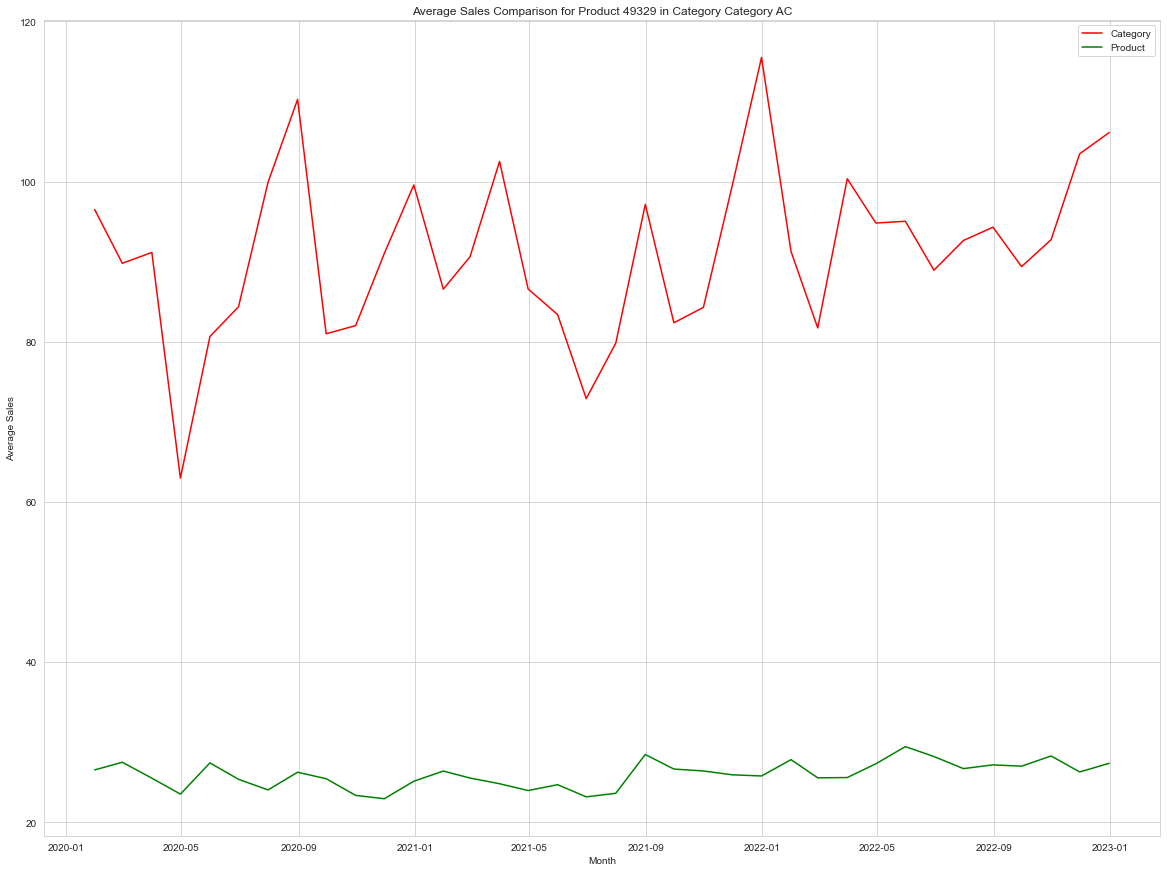

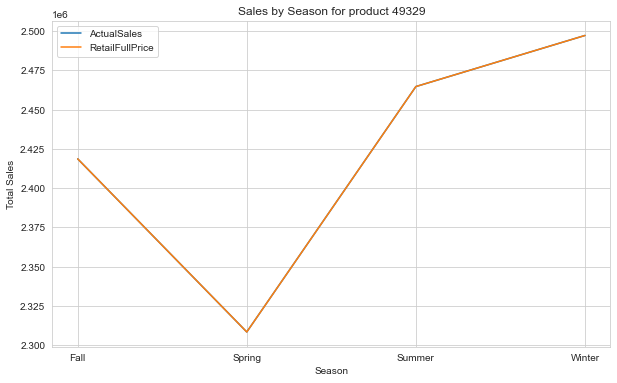

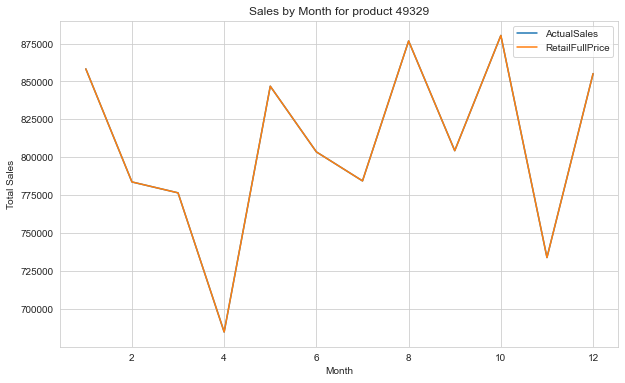

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


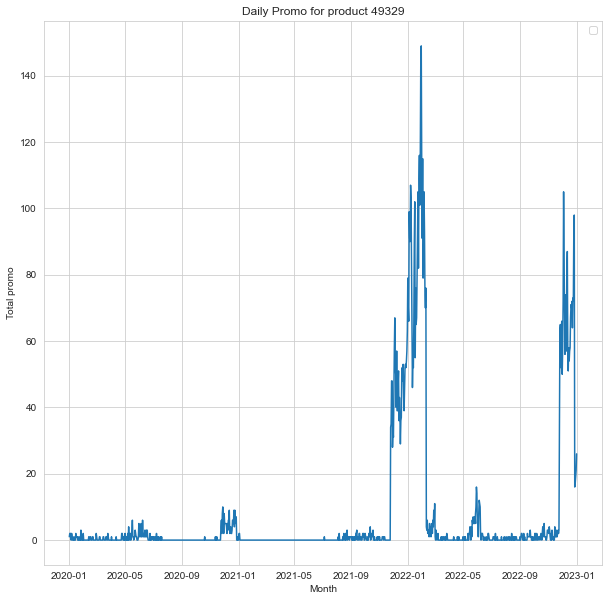

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


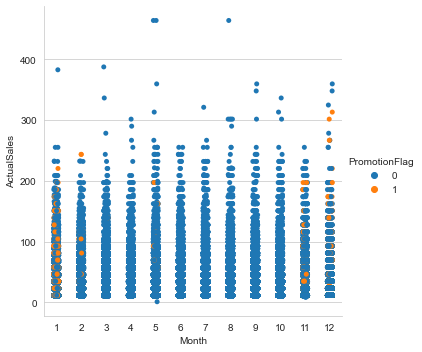

In [102]:
product_key = str(input("Pick the product ey you want to look into: ")) 
proddata = data_products[data_products['ProductKey'] == product_key]
insights = ProductInsights(data = total_products , productkey = product_key)
insights.summary()
insights.visualize_trends('ActualSales')
insights.visualize_trends('UnitVolume')

insights.top_stores(n=10)  #choose the n you want
insights.compare_categories('ProductCategory_Lvl2')
insights.sales_by_season()
insights.sales_by_month()
insights.promo_period()
insights.discounts_distribution()

In this section we simply delete variables to free up some space.

In [146]:
del adjusted_actual_sales
del adjusted_sales_discount
del absolute_discounts
del data_products
del mask_non_promo 
del new2_skeys

In [150]:
#del productCategory 
del promofin 
del regionA_sales
del test_data 
del transactions_p
del transactions_promo

In [151]:
del transactions_ps

In [152]:
del transactions_promo_p

In [68]:
#getting rid of it
#del sorted_transactions
del promotional_transactions
del absolute_discounts

Since our modelling part will regard 4 products only, we can create a specific dataset that includes products sold offline and with product keys of the selected products.

In [153]:
offline_prod_sales = total_products[(total_products['ProductKey'].isin(product_keys)) & (total_products['SalesType'] == 'Offline')]


One can see that the winter season has the most promotion and the highest average sales. This can be significant but we need to predict the baseline sales to infer the effect of promotions on sales. The catplot below shows how promotions and sales are related, showing the promoted products vs the others, and capturing the periods of discounts over the years.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


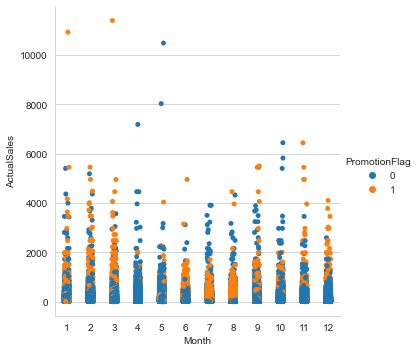

In [107]:

sns.catplot(data= offline_prod_sales, x= "Month", y= "ActualSales", hue="PromotionFlag")


## Task 3: Modelling product performance
Let us see some interesting differences in trends between promoted and non-promoted sales. Since we have to predict baseline sales, that is, what promoted product sales would be if no promotion was applied, we simply split the products data into 2: Train and test data. The first contains all the non-promoted sales product data, and hence will be the dataset we will train on.

In [154]:
test_data = offline_prod_sales[(offline_prod_sales['PromotionFlag'] == 1)]
train_data = offline_prod_sales[(offline_prod_sales['PromotionFlag'] == 0)]


Before starting to model, we create each personalized dataset by product. Considering the scenario and the task we are asked, we decide to train our model with daily aggregated data and not with single transactions. Not only does it allow us to compare more easily product performances, but also drastically reduce the data training time and complexity. After all, the primary goal is to discover the product elasticity, and the daily sales are more than enough to do so.

In [155]:
def aggregate_data_by_productkey(df, productkey):
    # Filter the dataframe to include only the rows with the specified productkey

    df_product = df[df['ProductKey'] == productkey]
    
    # Aggregate the daily data by sum and adding the relevant features
    df_product_agg = df_product.groupby(pd.Grouper(key ='TransactionDate', freq='D')).agg({'SalesDiscount': 'sum',
                                                                                          'Month': 'min', 
                                                                                          'Day': 'min', 
                                                                                          'SalesPercentage': 'mean',
                                                                                          'PromotionFlag': 'sum', 'UnitVolume': 'sum', 'ActualSales': 'sum',
                                                                                          'CPI_daily': 'min', 'WeekendFlag': 'min'}).reset_index()
    df_product_agg = df_product_agg.fillna(0)
    df_product_agg['WeekendFlag'] = df_product_agg['WeekendFlag'].astype(int)

    return df_product_agg 


    

#data for each product
train_49333 = aggregate_data_by_productkey(train_data, '49333')
test_49333 = aggregate_data_by_productkey(test_data, '49333')
p2_49333 = aggregate_data_by_productkey(offline_prod_sales, '49333')

train_49340 = aggregate_data_by_productkey(train_data, '49340')
test_49340 = aggregate_data_by_productkey(test_data, '49340')
p2_49340 = aggregate_data_by_productkey(offline_prod_sales, '49340')

train_49341 = aggregate_data_by_productkey(train_data, '49341')
test_49341 = aggregate_data_by_productkey(test_data, '49341')
p2_49341 = aggregate_data_by_productkey(offline_prod_sales, '49341')

train_49329 = aggregate_data_by_productkey(train_data, '49329')
test_49329 = aggregate_data_by_productkey(test_data, '49329')
p2_49329 = aggregate_data_by_productkey(offline_prod_sales, '49329')



#adding the season

train_49341['Season'] =  train_49341['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))
train_49333['Season'] = train_49333['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))
train_49329['Season'] = train_49329['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))
train_49340['Season'] = train_49340['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))

#test
p2_49341['Season'] =  p2_49341['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))
p2_49333['Season'] = p2_49333['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))
p2_49329['Season'] = p2_49329['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))
p2_49340['Season'] = p2_49340['TransactionDate'].apply(lambda x: get_season(pd.to_datetime(x)))


#creating new features for training sets
# Create features for trends, promotions, promo discount rate, and seasonality
train_49341['Days'] = (train_49341['TransactionDate'] - train_49341['TransactionDate'].min()) / np.timedelta64(1, 'D')
train_49341['PastPromotions'] = train_49341['PromotionFlag'].shift(1)
train_49341['PastPromoDiscount'] = train_49341['SalesPercentage'].shift(1)

## test 
p2_49341['Days'] = (p2_49341['TransactionDate'] - p2_49341['TransactionDate'].min()) / np.timedelta64(1, 'D')
p2_49341['PastPromotions'] = p2_49341['PromotionFlag'].shift(1)
p2_49341['PastPromoDiscount'] = p2_49341['SalesPercentage'].shift(1)
#train_49341['Seasonality'] = np.sin(2*np.pi*train_49341['Days']/365) + np.cos(2*np.pi*train_49341['Days']/365)

train_49333['Days'] = (train_49333['TransactionDate'] - train_49333['TransactionDate'].min()) / np.timedelta64(1, 'D')
train_49333['PastPromotions'] = train_49333['PromotionFlag'].shift(1)
train_49333['PastPromoDiscount'] = train_49333['SalesPercentage'].shift(1)
#train_49333['Seasonality'] = np.sin(2*np.pi*train_49333['Days']/365) + np.cos(2*np.pi*train_49333['Days']/365)
## test 
p2_49333['Days'] = (p2_49333['TransactionDate'] - p2_49333['TransactionDate'].min()) / np.timedelta64(1, 'D')
p2_49333['PastPromotions'] = p2_49333['PromotionFlag'].shift(1)
p2_49333['PastPromoDiscount'] = p2_49333['SalesPercentage'].shift(1)


train_49329['Days'] = (train_49329['TransactionDate'] - train_49329['TransactionDate'].min()) / np.timedelta64(1, 'D')
train_49329['PastPromotions'] = train_49329['PromotionFlag'].shift(1)
train_49329['PastPromoDiscount'] = train_49329['SalesPercentage'].shift(1)
#train_49329['Seasonality'] = np.sin(2*np.pi*train_49329['Days']/365) + np.cos(2*np.pi*train_49329['Days']/365)
## test 
p2_49329['Days'] = (p2_49329['TransactionDate'] - p2_49329['TransactionDate'].min()) / np.timedelta64(1, 'D')
p2_49329['PastPromotions'] = p2_49329['PromotionFlag'].shift(1)
p2_49329['PastPromoDiscount'] = p2_49329['SalesPercentage'].shift(1)


train_49340['Days'] = (train_49340['TransactionDate'] - train_49340['TransactionDate'].min()) / np.timedelta64(1, 'D')
train_49340['PastPromotions'] = train_49340['PromotionFlag'].shift(1)
train_49340['PastPromoDiscount'] = train_49340['SalesPercentage'].shift(1)
#train_49340['Seasonality'] = np.sin(2*np.pi*train_49340['Days']/365) + np.cos(2*np.pi*train_49340['Days']/365)

## test 
p2_49340['Days'] = (p2_49340['TransactionDate'] - p2_49340['TransactionDate'].min()) / np.timedelta64(1, 'D')
p2_49340['PastPromotions'] = p2_49340['PromotionFlag'].shift(1)
p2_49340['PastPromoDiscount'] = p2_49340['SalesPercentage'].shift(1)









Also, we want to add new important features in our model. These new features, namely, seasonality and season dummies, will help the model identifying eventual trends that occur systematically over the year, so that the model can learn from trends in non-promoted sales to predict what the total sales would have been, if all products were not promoted.

In [156]:
#computing fourier series seasonality
train_49341['Seasonality'] = np.sin(2*np.pi*train_49341['Days']/365) + np.cos(2*np.pi*train_49341['Days']/365)
train_49333['Seasonality'] = np.sin(2*np.pi*train_49333['Days']/365) + np.cos(2*np.pi*train_49333['Days']/365)
train_49329['Seasonality'] = np.sin(2*np.pi*train_49329['Days']/365) + np.cos(2*np.pi*train_49329['Days']/365)
train_49340['Seasonality'] = np.sin(2*np.pi*train_49340['Days']/365) + np.cos(2*np.pi*train_49340['Days']/365)
#test
p2_49341['Seasonality'] = np.sin(2*np.pi*p2_49341['Days']/365) + np.cos(2*np.pi*p2_49341['Days']/365)
p2_49333['Seasonality'] = np.sin(2*np.pi*p2_49333['Days']/365) + np.cos(2*np.pi*p2_49333['Days']/365)
p2_49329['Seasonality'] = np.sin(2*np.pi*p2_49329['Days']/365) + np.cos(2*np.pi*p2_49329['Days']/365)
p2_49340['Seasonality'] = np.sin(2*np.pi*p2_49340['Days']/365) + np.cos(2*np.pi*p2_49340['Days']/365)


#filling nan
train_49333.fillna(0, inplace=True)
train_49341.fillna(0, inplace=True)
train_49329.fillna(0, inplace=True)
train_49340.fillna(0, inplace=True)
#test
p2_49333.fillna(0, inplace=True)
p2_49341.fillna(0, inplace=True)
p2_49329.fillna(0, inplace=True)
p2_49340.fillna(0, inplace=True)




#getting dummies for season 
season_dummies = pd.get_dummies(train_49333['Season'], prefix='season')
train_49333 = pd.concat([train_49333, season_dummies], axis=1)

season_dummies = pd.get_dummies(train_49341['Season'], prefix='season')
train_49341 = pd.concat([train_49341, season_dummies], axis=1)

season_dummies = pd.get_dummies(train_49329['Season'], prefix='season')
train_49329 = pd.concat([train_49329, season_dummies], axis=1)

season_dummies = pd.get_dummies(train_49340['Season'], prefix='season')
train_49340 = pd.concat([train_49340, season_dummies], axis=1)

#dropping season
train_49333.drop(columns=['Season'],inplace=True)
train_49341.drop(columns=['Season'],inplace=True)
train_49329.drop(columns=['Season'],inplace=True)
train_49340.drop(columns=['Season'],inplace=True)
#test
p2_49333.drop(columns=['Season'],inplace=True)
p2_49341.drop(columns=['Season'],inplace=True)
p2_49329.drop(columns=['Season'],inplace=True)
p2_49340.drop(columns=['Season'],inplace=True)

p2_49333.head()


TransactionDate  SalesDiscount  Month  Day  SalesPercentage  PromotionFlag  \
0      2020-01-02        0.00000      1    2         0.000000              0   
1      2020-01-03      -18.71915      1    3         0.000490              3   
2      2020-01-04      -11.38968      1    4         0.000227              1   
3      2020-01-05      -15.02805      1    5         0.000226              1   
4      2020-01-06        0.00000      1    6         0.000000              0   

   UnitVolume  ActualSales  CPI_daily  WeekendFlag  Days  PastPromotions  \
0      1474.0  55139.76100      122.4            0   0.0             0.0   
1      1388.0  51901.34805      122.4            0   1.0             0.0   
2      1854.0  69377.07192      122.4            1   2.0             3.0   
3      1920.0  71866.50795      122.4            1   3.0             1.0   
4      1059.0  39647.15970      122.4            0   4.0             1.0   

   PastPromoDiscount  Seasonality  
0           0.000000     1.000000  
1           0.000000     1.017065  
2           0.000490     1.033829  
3           0.000227     1.050286  
4           0.000226     1.066433

It is  easy to see that some periods have no promotion for this product. The There was no discount from June to roughly October 2021, which is a very long time!

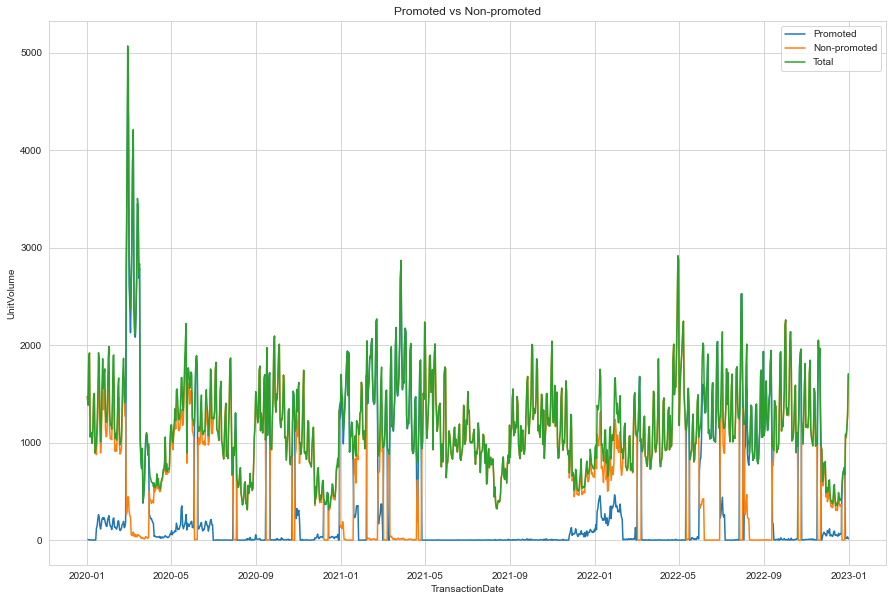

In [157]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='TransactionDate', y='UnitVolume', data=test_49333, ax=ax, label='Promoted')
sns.lineplot(x='TransactionDate', y='UnitVolume', data=train_49333, ax=ax, label='Non-promoted')
sns.lineplot(x='TransactionDate', y='UnitVolume', data=p2_49333, ax=ax, label='Total')
ax.set(title='Promoted vs Non-promoted')
ax.legend()
plt.show() 

## Modelling
As part of the modelling part, we will use 2 different machine learning algorithms to predict the baseline sales for each product. The first Random forest, exploits the power of decision trees to select the most relevant features and predict using a regression the target variable. Note that we want both to predict the unitvolume to show more clearly what the baseline volumes would be, and the actualsales themselves to compute the elasticity for each product.

In [159]:
# Import necessary libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
def random_forest_uv(train, test):

    # Load the data (note that )
    #train_data = train_49333
    #test_data = p2_49333

    # Split the data into X and y
    X_train = train.drop(columns=['TransactionDate','UnitVolume', 'season_Fall','ActualSales'])
    y_train = train['UnitVolume']
    X_test = test.drop(columns=['TransactionDate','UnitVolume', 'ActualSales'])
    y_test = test['UnitVolume']

    # Fill in missing values with 0
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)

    # Perform grid search to find the best hyperparameters
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Train a Random Forest model with the selected hyperparameters on the entire training dataset
    best_rf = grid_search.best_estimator_
    best_rf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_rf.predict(X_test)

    # Calculate the RMSE and MAPE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print('RMSE:', rmse)
    print('MAPE:', mape)
    return [y_pred, y_test]

rand_uv_33 = random_forest_uv(train_49333, p2_49333)


RMSE: 659.9972832115565
MAPE: 27.005378210585928


This function below performs the random forest algorithm to predict actual sales. However, we will use XGboost predictions to compute elasticities, as it proved to be more credible according to the product trends.

In [160]:
def random_forest_as(train, test):
    

    # Split the data into X and y
    X_train = train.drop(columns=['TransactionDate','UnitVolume', 'season_Fall','ActualSales'])
    y_train = train['ActualSales']
    X_test = test.drop(columns=['TransactionDate','UnitVolume', 'ActualSales'])
    y_test = test['ActualSales']

    # Fill in missing values with 0
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)

    # Perform grid search to find the best hyperparameters
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Train a Random Forest model with the selected hyperparameters on the entire training dataset
    best_rf = grid_search.best_estimator_
    best_rf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_rf.predict(X_test)

    # Calculate the RMSE and MAPE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print('RMSE:', rmse)
    print('MAPE:', mape)
    return [y_pred, y_test]

rand_as33 = random_forest_as(train_49333, p2_49333)

RMSE: 23302.20513440449
MAPE: 26.04267197045115


In [163]:
# Import necessary libraries
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def xgboost_uv(train, test):

    # Load the data
    X_train = train.drop(columns=['TransactionDate','season_Fall','UnitVolume','ActualSales'])
    y_train = train['UnitVolume']
    X_test = test.drop(columns=['TransactionDate','ActualSales','UnitVolume'])
    y_test = test['UnitVolume']

    # Fill in missing values with 0
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)

    # Perform grid search to find the best hyperparameters
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.3]
    }
    xgb = XGBRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Train an XGBoost model with the selected hyperparameters on the entire training dataset
    best_xgb = grid_search.best_estimator_
    best_xgb.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_xgb.predict(X_test)

    # Calculate the RMSE and MAPE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print('RMSE:', rmse)
    print('MAPE:', mape)
    return [y_pred, y_test]

xgb_uv33 = xgboost_uv(train_49333, p2_49333)

RMSE: 696.261722425829
MAPE: 25.493157810638316


In [164]:
# Import necessary libraries
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def xgboost_as(train, test):

    # Load the data
    X_train = train.drop(columns=['TransactionDate', 'UnitVolume','season_Fall','ActualSales'])
    y_train = train['ActualSales']
    X_test = test.drop(columns=['TransactionDate', 'UnitVolume','ActualSales'])
    y_test = test['ActualSales']

    # Fill in missing values with 0
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)

    # Perform grid search to find the best hyperparameters
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.3]
    }
    xgb = XGBRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Train an XGBoost model with the selected hyperparameters on the entire training dataset
    best_xgb = grid_search.best_estimator_
    best_xgb.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_xgb.predict(X_test)

    # Calculate the RMSE and MAPE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print('RMSE:', rmse)
    print('MAPE:', mape)
    return [y_pred, y_test]

xgb_as33 = xgboost_as(train_49333, p2_49333)


RMSE: 24525.24806898089
MAPE: 24.938451662926354


In [165]:
# Compare the predictions with the test data
def comparison_df(y_pred, y_test):
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(comparison_df.head(10))
    return comparison_df 


#comparison33 = comparison_df(rand_as33[0], rand_as33[1])
#comparison33plot = comparison_df(rand_uv_33[0], rand_uv_33[1])
#display(comparison33plot)
comparison33xgb = comparison_df(xgb_as33[0], xgb_as33[1])
comparison33xgbplot = comparison_df(xgb_uv33[0], xgb_uv33[1])


        Actual     Predicted
0  55139.76100  55352.847656
1  51901.34805  51494.726562
2  69377.07192  68274.117188
3  71866.50795  68274.117188
4  39647.15970  40217.070312
5  41440.40154  40427.277344
6  39871.78950  39942.687500
7  37150.02509  40387.632812
8  43211.81316  40387.632812
9  54937.27780  56276.707031
   Actual    Predicted
0  1474.0  1443.642700
1  1388.0  1401.726074
2  1854.0  1829.309448
3  1920.0  1847.347046
4  1059.0  1067.016602
5  1107.0  1073.916626
6  1065.0  1078.010010
7   993.0  1078.010010
8  1155.0  1076.356689
9  1468.0  1476.157959


For the sake of simplicity, we will plot the unitvolume predictions only, as it is easier to visualize the baseline trend over time. 

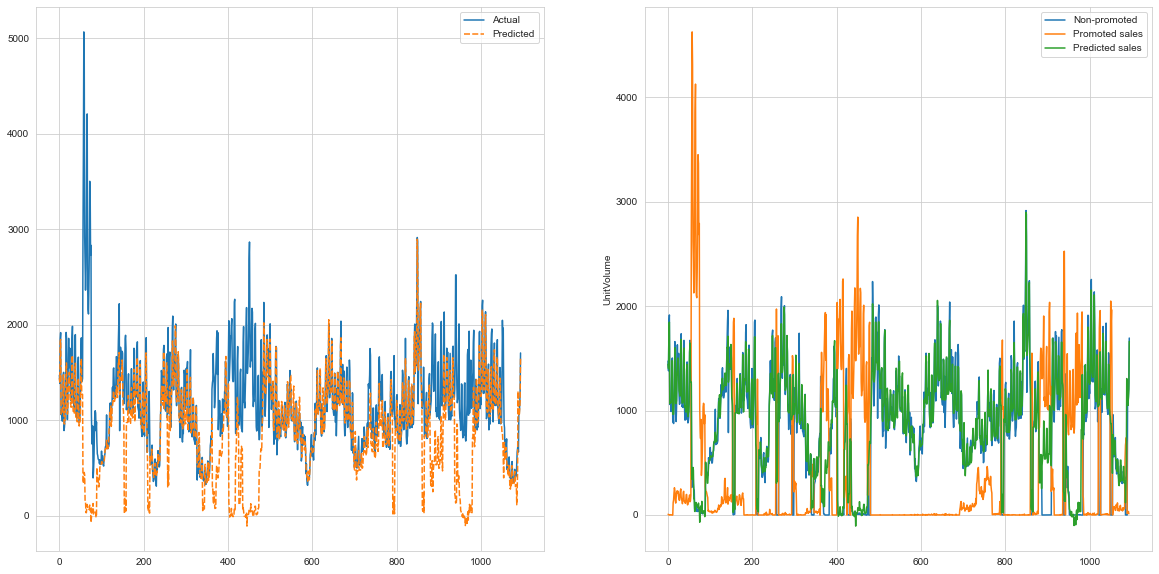

In [166]:
##plotting the unit volume predictions
def plot(df,test,train):
    

    sns.set_style("whitegrid")

    # Create a DataFrame with actual and predicted values
    #comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # Plot the line plot
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    sns.lineplot(data=df, ax=ax[0])
    sns.lineplot(x=train.index, y='UnitVolume', data=train, ax=ax[1], label='Non-promoted')
    sns.lineplot(x=test.index, y='UnitVolume', data=test, label='Promoted sales', ax=ax[1])
    sns.lineplot(data=df['Predicted'], ax=ax[1], label='Predicted sales')

    plt.show()

plot(df = comparison33xgbplot, test = test_49333, train = train_49333)
#plot(df = comparison33plot, test = test_49333, train = train_49333)

Here we will compute the elasticity function that computes the elasticity for each product.

In [193]:

def elasticity(comparisondf, df, prodkey):
    comparisondf['SalesDiscount'] = df['SalesDiscount']
    comparisondf[comparisondf['Predicted'] < 0] = 0   #xgboost predicts some negative sales, even though that cannot be true!
    elasticitydf = pd.DataFrame()
    elasticity =  -(comparisondf['Predicted'].sum() - comparisondf['Actual'].sum()) / comparisondf['SalesDiscount'].sum()
    elasticitydf[prodkey] = elasticity 
    print(elasticity)
    #print(comparisondf['Actual'].sum())
    #print(comparisondf['Predicted'].sum())
    #print(comparisondf['SalesDiscount'].sum())
    return elasticitydf 


    

x = elasticity(comparison33xgb, p2_49333, '49333') 

-5.699336338734841


We notice that some predictions were actually higher than the actualsales. This was taken into account as the model cannot be perfect and cannot know that predictions must not be higher than actual sales.

In [194]:
comparison33xgb.head(10)

Actual     Predicted  SalesDiscount
0  55139.76100  55352.847656        0.00000
1  51901.34805  51494.726562      -18.71915
2  69377.07192  68274.117188      -11.38968
3  71866.50795  68274.117188      -15.02805
4  39647.15970  40217.070312        0.00000
5  41440.40154  40427.277344       -3.79656
6  39871.78950  39942.687500        0.00000
7  37150.02509  40387.632812       -3.74383
8  43211.81316  40387.632812       -7.27674
9  54937.27780  56276.707031        0.00000


## Product 49329
After analyzing the product 49333, we dive into the the 49329 one. First we will start predicting and then storing the results in the dfs.

In [196]:
#predicting the unit volumes and actual sales using both models.
print('These are the error estimates for the random forest model ')
rand_uv_29 = random_forest_uv(train_49329, p2_49329)
rand_as29 = random_forest_as(train_49329, p2_49329)
print('These are the error estimates for the XGBboost model ')

xgb_uv29 = xgboost_uv(train_49329, p2_49329)
xgb_as29 = xgboost_as(train_49329, p2_49329)

print('these are the summarising dfs for the predictions')

#comparison33 = comparison_df(rand_as33[0], rand_as33[1])
comparison29plot = comparison_df(rand_uv_33[0], rand_uv_33[1])
#display(comparison33plot)
comparison29xgb = comparison_df(xgb_as29[0], xgb_as29[1])
comparison29xgbplot = comparison_df(xgb_uv29[0], xgb_uv29[1])





These are the error estimates for the random forest model 
RMSE: 142.0897840572013
MAPE: 14.89808513354189
RMSE: 1581.1845171898915
MAPE: 14.662247782292617
These are the error estimates for the XGBboost model 
RMSE: 72.11386616980508
MAPE: 5.184334201985422
RMSE: 1327.6132714483333
MAPE: 11.77772042383464
   Actual    Predicted
0  1474.0  1398.393683
1  1388.0  1337.643185
2  1854.0  1815.326410
3  1920.0  1839.095299
4  1059.0  1076.707037
5  1107.0  1069.380040
6  1065.0  1063.202777
7   993.0  1050.849417
8  1155.0  1048.528146
9  1468.0  1568.692596
        Actual     Predicted
0   9519.61055   8738.562500
1   9167.69053   8683.475586
2  12596.82789  11347.909180
3  12893.48687  11347.909180
4   7707.01680   8493.228516
5   7349.24375   8493.228516
6   7462.24414   8439.753906
7   7042.61880   8351.300781
8   7585.21050   8351.300781
9   9844.16370  11172.949219
   Actual    Predicted
0   860.0   850.933289
1   829.0   822.222595
2  1138.0  1129.822754
3  1165.0  1136.354248
4   6

Plotting the results of xgb. We notice that some entries are negative, even though the prediction looks better than random forest one as the promotion spikes are correctly detected and the predicted sales in non-promo periods follow rigorously the trend of non-promoted products sales.

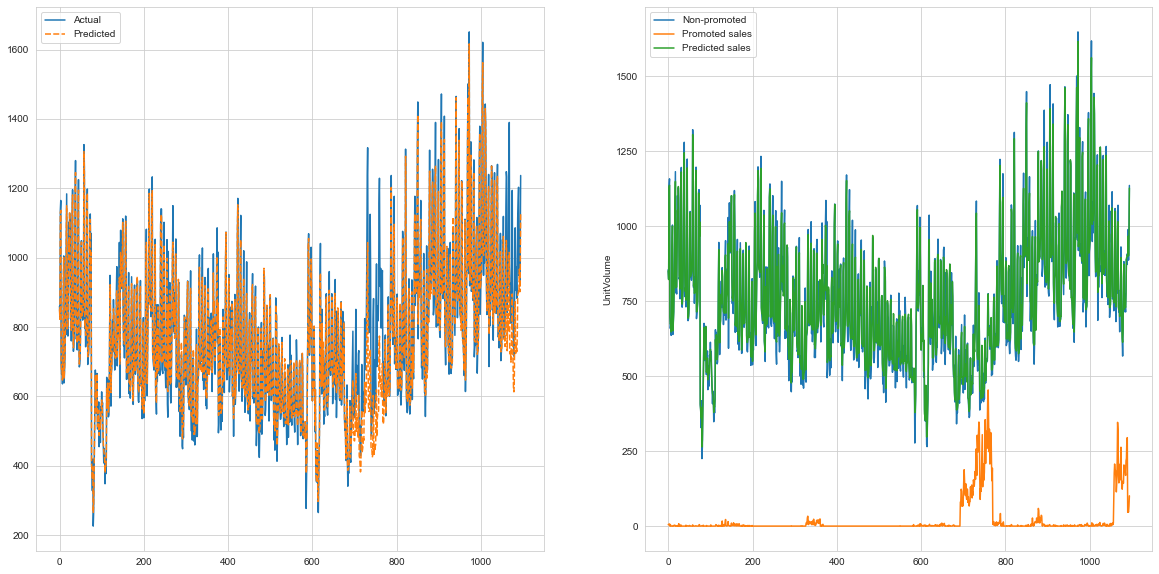

In [197]:

plot(df = comparison29xgbplot, test = test_49329, train = train_49329)

Here's the random forest results. The algorithm has completely failed in detecting the baseline sales, as they cannot be higher than the actual for most of the time!

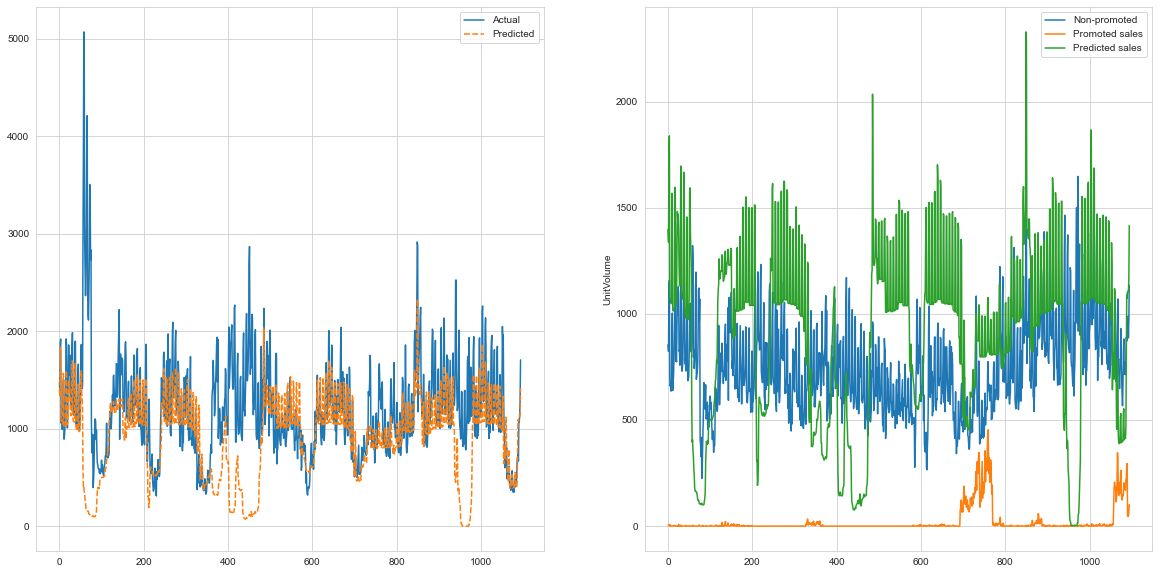

In [198]:
plot(df = comparison29plot, test = test_49329, train = train_49329)

This is the computed elasticity for the product:

In [199]:
elasticity(comparison29xgb, p2_49329, '49329') 


-10.942014436412615


Empty DataFrame
Columns: [49329]
Index: []

## Product 49340
The final elasticty reflects the potetial sales the retailer could get by promoting this product more. This also applies to the last product 49329, which did not any promo period at all, except for the 2021-2022 winter session.

In [201]:
#predicting the unit volumes and actual sales using both models.
print('These are the error estimates for the random forest model ')
rand_uv_40 = random_forest_uv(train_49340, p2_49340)
rand_as40 = random_forest_as(train_49340, p2_49340)
print('These are the error estimates for the XGBboost model ')

xgb_uv40 = xgboost_uv(train_49340, p2_49340)
xgb_as40 = xgboost_as(train_49340, p2_49340)   

print('these are the summarising dfs for the predictions')

#comparison33 = comparison_df(rand_as33[0], rand_as33[1])
comparison40plot = comparison_df(rand_uv_40[0], rand_uv_40[1])
#display(comparison33plot)
comparison40xgb = comparison_df(xgb_as40[0], xgb_as40[1])
comparison40xgbplot = comparison_df(xgb_uv40[0], xgb_uv40[1])   


These are the error estimates for the random forest model 
RMSE: 149.76075893483562
MAPE: 20.42897337519013
RMSE: 1420.8195710279163
MAPE: 19.891567685085942
These are the error estimates for the XGBboost model 
RMSE: 144.59938380473
MAPE: 15.906112921262455
RMSE: 1689.2852219349622
MAPE: 24.192511574849032
these are the summarising dfs for the predictions
   Actual    Predicted
0  1078.0  1021.560704
1  1128.0  1017.196704
2  1399.0  1425.604000
3  1467.0  1445.524000
4   793.0   783.616474
5   743.0   774.366093
6   749.0   767.714904
7   713.0   766.574904
8   840.0   784.726095
9  1236.0  1295.282000
        Actual     Predicted
0  10798.04940   8401.605469
1  11299.03713   8401.605469
2  14015.15943  12475.547852
3  14685.99049  12475.547852
4   7944.82910   8401.605469
5   7443.89410   8401.605469
6   7504.00630   8401.605469
7   7143.33310   8401.605469
8   8415.70800   8401.605469
9  12381.00400  12475.547852
   Actual    Predicted
0  1078.0  1082.149658
1  1128.0  1092.965332


The result confirms once again the superiority of XGBoost over random forest as the trends are more accurate and detect well the promotion spikes (Looking at the winter season between 600 and 800 day and the clearly incorrect predictions of random forest between 500 and 600 day).

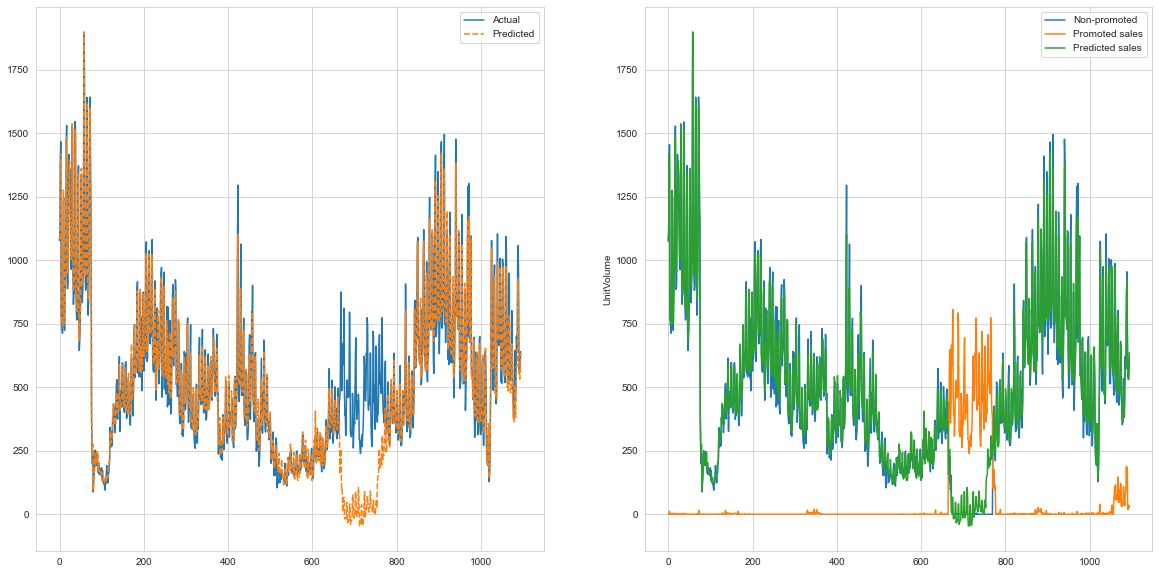

In [202]:
plot(df = comparison40xgbplot, test = test_49340, train = train_49340)

For the random forest model we get:

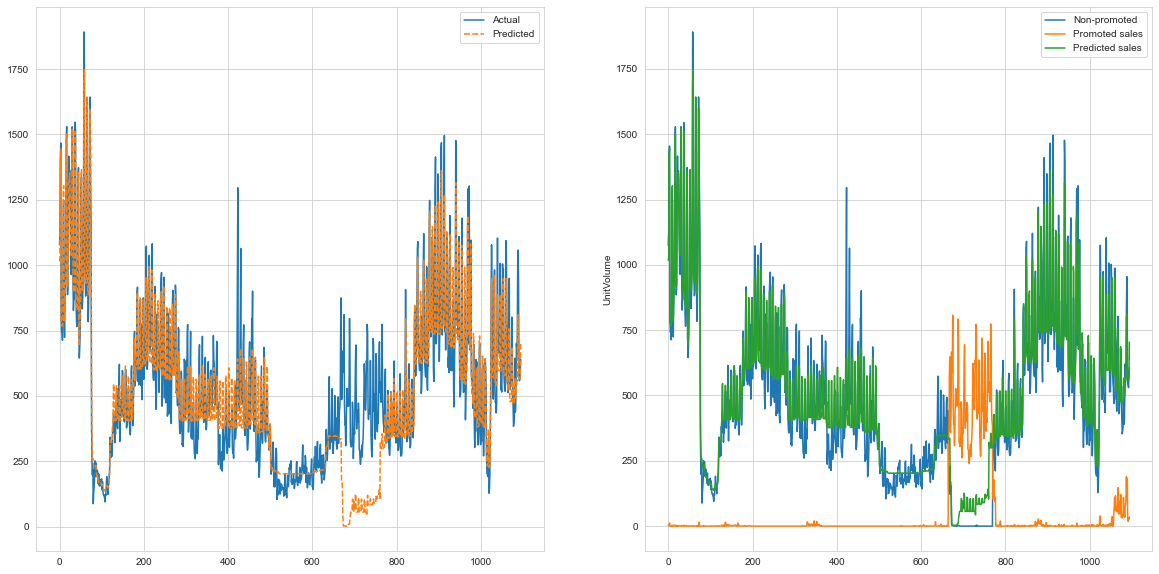

In [203]:
plot(df = comparison40plot, test = test_49340, train = train_49340)

And Finally, the elasticity is computed:

In [204]:
elasticity(comparison29xgb, p2_49340, '49340')

-11.328874200851233


Empty DataFrame
Columns: [49340]
Index: []

## Product 49341 
An overview of the product baseline is given below. The lower elasticity (-6.5) reflects the more aggressive pricing strategy of the retailer, making it a more stable sales volume product than 49340 and 49341. This is the strategy that could make the retailers risk less in the future, as the product can be less exposed to changes in demand.


In [205]:
#predicting the unit volumes and actual sales using both models.
print('These are the error estimates for the random forest model ')
rand_uv_41 = random_forest_uv(train_49341, p2_49341)
rand_as41 = random_forest_as(train_49341, p2_49341)
print('These are the error estimates for the XGBboost model ')

xgb_uv41 = xgboost_uv(train_49341, p2_49341)
xgb_as41 = xgboost_as(train_49341, p2_49341)   

print('These are the summarising dfs for the predictions')

#comparison33 = comparison_df(rand_as33[0], rand_as33[1])
comparison41plot = comparison_df(rand_uv_41[0], rand_uv_41[1])
#display(comparison33plot)
comparison41xgb = comparison_df(xgb_as41[0], xgb_as41[1])
comparison41xgbplot = comparison_df(xgb_uv41[0], xgb_uv41[1])   

These are the error estimates for the random forest model 
RMSE: 211.04143965187563
MAPE: 29.723224904940825
RMSE: 4138.3522425020365
MAPE: 24.416733617980498
These are the error estimates for the XGBboost model 
RMSE: 183.60431059716615
MAPE: 24.439551471117298
RMSE: 4493.953065797797
MAPE: 25.70906772150853
These are the summarising dfs for the predictions
   Actual    Predicted
0  1150.0   949.310582
1  1001.0   949.310582
2  1606.0  1440.294742
3  1740.0  1440.294742
4   825.0   949.310582
5   879.0   949.310582
6  1030.0   949.310582
7   804.0   949.310582
8   860.0   949.310582
9  1376.0  1440.294742
        Actual     Predicted
0  24862.19500  18613.535156
1  21627.84226  18613.535156
2  34703.14217  28822.042969
3  37586.78768  28822.042969
4  17835.92250  18287.466797
5  19003.36470  18287.466797
6  22259.17855  18287.466797
7  17381.91720  18287.466797
8  18542.55723  17956.373047
9  29480.34113  28164.878906
   Actual    Predicted
0  1150.0   990.489441
1  1001.0   990.48944

Plotting the results, we notice all the limitations of the random forest model. When no close promotion period is seen, the baseline follows a stable line, which does not correspond to actual sales in these periods (look at 100 to 250 day, no promo period is close but the model does not detect the sales trend of non-promo sales). On the other hand, the XGBoost algorithm has overestimated baseline when promotion periods were in place, but we expected that sales could not fall drastically to 0 in that period, and therefore the model seems satisfactory.

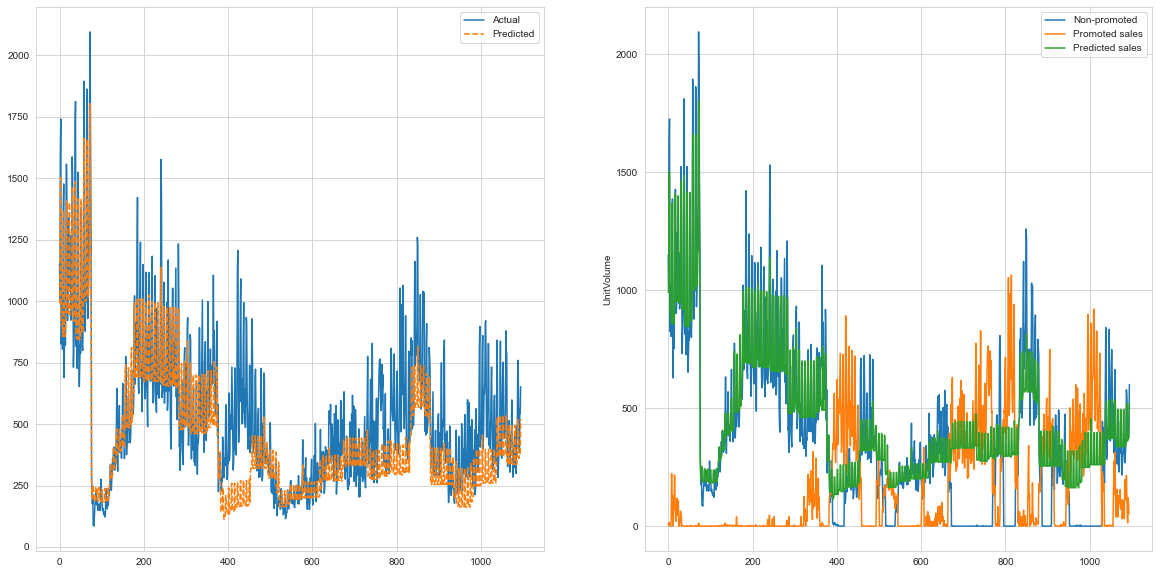

In [206]:
plot(df = comparison41xgbplot, test = test_49341, train = train_49341) 

For the random forest model, these predictions were made:

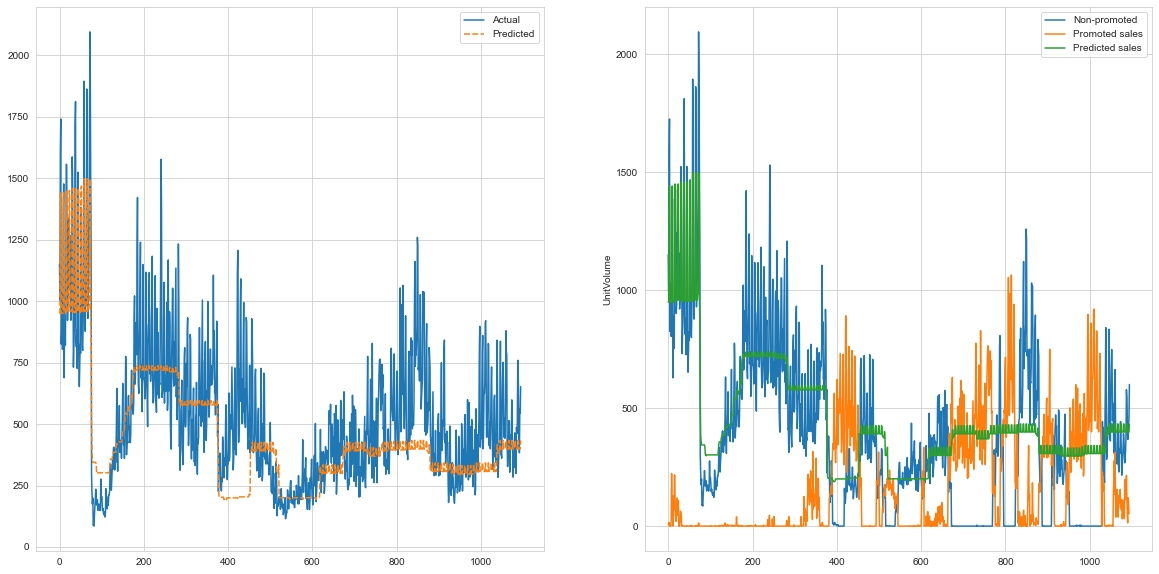

In [207]:
plot(df = comparison41plot, test = test_49341, train = train_49341) 

In [208]:
elasticity(comparison41xgb, p2_49341, '49341') 

-6.043615358163451


Empty DataFrame
Columns: [49341]
Index: []

# Final consideration: How effective promotions could boost product sales and conversely, stabilize efficient sales flow.
In our product analysis we have seen how promotions drastically change sales performance. The more 'conservative' strategies implemented with the products '49329' and '49340' prevented their sales potential to be unleashed. Their elasticity testifies this; as soon as the promo spikes comes, the products uplift contributed to higher sales and a general increasing in unitvolumes afterwards, simulating the general retailer trend in 2022. Since these products are more elastic, it means that they could be much more responsive to promotions, (even though we assume that, given their prices, they could be essential or common consumer goods) and therefore a more aggressive promotion strategy could potentially boost sales volume, making them more stable and sustainable overtime. 

On the other hand, the 2 outperforming products see stable and profitable sales volumes that boost the product performance. It is no surprise to see how the baseline sales differ from the actual in the '49333' product, especially in 2020, as promotions contributed massively to that spike. Still, frequent and periodic promos stabilized volumes, making them a more sustainable strategy for the business that can benefit this in the long term. Two opposite approach could be taken to make the retailer more profitable:
1) Act more aggressively on non-promoted products to gain market segments and customers from eventual competitors, as this can lead to higher and more stable sales.
2) In the long run, the 2 outperforming products may experience not increasing trends in sales as the elasticity could furtherly decrease, and any promo may not be effective to increase sales. It is then important to ponder wisely the promo strategies and keeping prices more stable in the long run.